# ANÁLISIS COMPLETO SIN OUTLIERS

## Lectura de datos

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/dataframe_without_outliers.csv',sep=',', encoding='latin-1', index_col=0, low_memory=False, parse_dates=['FECHA'])
df_edit = pd.read_csv('../data_edit/dataframe_without_outliers.csv',sep=',', encoding='latin-1', index_col=0, low_memory=False, parse_dates=['FECHA'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86185 entries, 0 to 87647
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   FECHA                     86185 non-null  datetime64[ns]
 1   HORA                      86185 non-null  int64         
 2   CAUDAL                    86167 non-null  float64       
 3   CAL_1RIA_KG               27 non-null     float64       
 4   CAL_1RIA_DOSIS            556 non-null    float64       
 5   AGUA_CRUDA_P.H            85831 non-null  float64       
 6   AGUA_CRUDA_COLOR          80395 non-null  float64       
 7   AGUA_CRUDA_NTU            86100 non-null  float64       
 8   AGUA_CRUDA_ALCALINIDAD    67791 non-null  float64       
 9   AGUA_CRUDA_CONDUCTIVIDAD  59558 non-null  float64       
 10  COAGULANTE_GRANULADO      5788 non-null   float64       
 11  COAGULANTE_LIQUIDO        135 non-null    float64       
 12  COAGULANTE_DOSIS  

In [4]:
df_edit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51705 entries, 35 to 87647
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   FECHA                     51705 non-null  datetime64[ns]
 1   HORA                      51705 non-null  int64         
 2   CAUDAL                    51694 non-null  float64       
 3   CAL_1RIA_KG               25 non-null     float64       
 4   CAL_1RIA_DOSIS            538 non-null    float64       
 5   AGUA_CRUDA_P.H            51413 non-null  float64       
 6   AGUA_CRUDA_COLOR          48800 non-null  float64       
 7   AGUA_CRUDA_NTU            51620 non-null  float64       
 8   AGUA_CRUDA_ALCALINIDAD    42813 non-null  float64       
 9   AGUA_CRUDA_CONDUCTIVIDAD  38109 non-null  float64       
 10  COAGULANTE_GRANULADO      5727 non-null   float64       
 11  COAGULANTE_LIQUIDO        132 non-null    float64       
 12  COAGULANTE_DOSIS 

El análisis se llevará a cabo únicamente para aquellos datos asociados al tratamiento realizado con coagulante granulado, dado que este ha sido el coagulante más utilizado en la planta de agua potable El Tablazo. Esta preferencia se evidencia al comparar la cantidad de datos correspondientes al uso de coagulante líquido, que en este caso suma 91 entradas.

In [5]:
df = df[df['COAGULANTE_LIQUIDO'].isnull()]
df = df.copy()
df.dropna(how='all', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86050 entries, 0 to 87647
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   FECHA                     86050 non-null  datetime64[ns]
 1   HORA                      86050 non-null  int64         
 2   CAUDAL                    86032 non-null  float64       
 3   CAL_1RIA_KG               27 non-null     float64       
 4   CAL_1RIA_DOSIS            556 non-null    float64       
 5   AGUA_CRUDA_P.H            85697 non-null  float64       
 6   AGUA_CRUDA_COLOR          80260 non-null  float64       
 7   AGUA_CRUDA_NTU            85965 non-null  float64       
 8   AGUA_CRUDA_ALCALINIDAD    67691 non-null  float64       
 9   AGUA_CRUDA_CONDUCTIVIDAD  59501 non-null  float64       
 10  COAGULANTE_GRANULADO      5782 non-null   float64       
 11  COAGULANTE_DOSIS          43483 non-null  float64       
 12  AGUA_TRATADA_CLORO

In [6]:
df_edit = df_edit[df_edit['COAGULANTE_LIQUIDO'].isnull()]
df_edit = df_edit.copy()
df_edit.dropna(how='all', axis=1, inplace=True)
df_edit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51573 entries, 35 to 87647
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   FECHA                     51573 non-null  datetime64[ns]
 1   HORA                      51573 non-null  int64         
 2   CAUDAL                    51562 non-null  float64       
 3   CAL_1RIA_KG               25 non-null     float64       
 4   CAL_1RIA_DOSIS            538 non-null    float64       
 5   AGUA_CRUDA_P.H            51282 non-null  float64       
 6   AGUA_CRUDA_COLOR          48668 non-null  float64       
 7   AGUA_CRUDA_NTU            51488 non-null  float64       
 8   AGUA_CRUDA_ALCALINIDAD    42716 non-null  float64       
 9   AGUA_CRUDA_CONDUCTIVIDAD  38055 non-null  float64       
 10  COAGULANTE_GRANULADO      5721 non-null   float64       
 11  COAGULANTE_DOSIS          43483 non-null  float64       
 12  AGUA_TRATADA_CLOR

## Análisis de datos faltantes

In [7]:
nulos=pd.DataFrame()
nulos['% de nulos'] = ((df.isnull().sum() / len(df))*100).sort_values(ascending = False)
nulos['N de nulos'] = df.isnull().sum().sort_values(ascending = False)
nulos['N de NO nulos'] = df.notnull().sum().sort_values(ascending = False)
nulos.index.name = 'Variables'
nulos=nulos.reset_index()
nulos

Variables  % de nulos  N de nulos  N de NO nulos
0                CAL_1RIA_KG   99.968623       86023             27
1             CAL_1RIA_DOSIS   99.353864       85494            556
2       COAGULANTE_GRANULADO   93.280651       80268           5782
3                TEMP_HUMEDA   92.096456       79249           6801
4                  TEMP_SECA   88.848344       76454           9596
5             PRECIPITACION2   70.697269       60835          25215
6   AGUA_TRATADA_ALCALINIDAD   58.328879       50192          35858
7              PRECIPITACION   54.106915       46559          39491
8           COAGULANTE_DOSIS   49.467751       42567          43483
9   AGUA_CRUDA_CONDUCTIVIDAD   30.852992       26549          59501
10    AGUA_CRUDA_ALCALINIDAD   21.335270       18359          67691
11                VEL_VIENTO   17.425915       14995          71055
12        AGUA_TRATADA_CLORO   11.277164        9704          76346
13        AGUA_TRATADA_COLOR    9.844277        8471          77579
14          AGUA_CRUDA_COLOR    6.728646        5790          80260
15          AGUA_TRATADA_P.H    2.928530        2520          83530
16          AGUA_TRATADA_NTU    2.725160        2345          83705
17            AGUA_CRUDA_P.H    0.410227         353          85697
18            AGUA_CRUDA_NTU    0.098780          85          85965
19                    CAUDAL    0.020918          18          86032
20                      HORA    0.000000           0          86050
21                     FECHA    0.000000           0          86050

In [8]:
nulos=pd.DataFrame()
nulos['% de nulos'] = ((df_edit.isnull().sum() / len(df))*100).sort_values(ascending = False)
nulos['N de nulos'] = df_edit.isnull().sum().sort_values(ascending = False)
nulos['N de NO nulos'] = df_edit.notnull().sum().sort_values(ascending = False)
nulos.index.name = 'Variables'
nulos=nulos.reset_index()
nulos

Variables  % de nulos  N de nulos  N de NO nulos
0                CAL_1RIA_KG   59.904707       51548             25
1             CAL_1RIA_DOSIS   59.308542       51035            538
2                TEMP_HUMEDA   55.074956       47392           4181
3                  TEMP_SECA   53.443347       45988           5585
4       COAGULANTE_GRANULADO   53.285299       45852           5721
5             PRECIPITACION2   38.428820       33068          18505
6   AGUA_TRATADA_ALCALINIDAD   34.149913       29386          22187
7              PRECIPITACION   34.006973       29263          22310
8   AGUA_CRUDA_CONDUCTIVIDAD   15.709471       13518          38055
9                 VEL_VIENTO   13.696688       11786          39787
10    AGUA_CRUDA_ALCALINIDAD   10.292853        8857          42716
11          COAGULANTE_DOSIS    9.401511        8090          43483
12        AGUA_TRATADA_CLORO    9.023823        7765          43808
13        AGUA_TRATADA_COLOR    5.733876        4934          46639
14          AGUA_CRUDA_COLOR    3.375944        2905          48668
15          AGUA_TRATADA_P.H    2.180128        1876          49697
16          AGUA_TRATADA_NTU    2.010459        1730          49843
17            AGUA_CRUDA_P.H    0.338175         291          51282
18            AGUA_CRUDA_NTU    0.098780          85          51488
19                    CAUDAL    0.012783          11          51562
20                      HORA    0.000000           0          51573
21                     FECHA    0.000000           0          51573

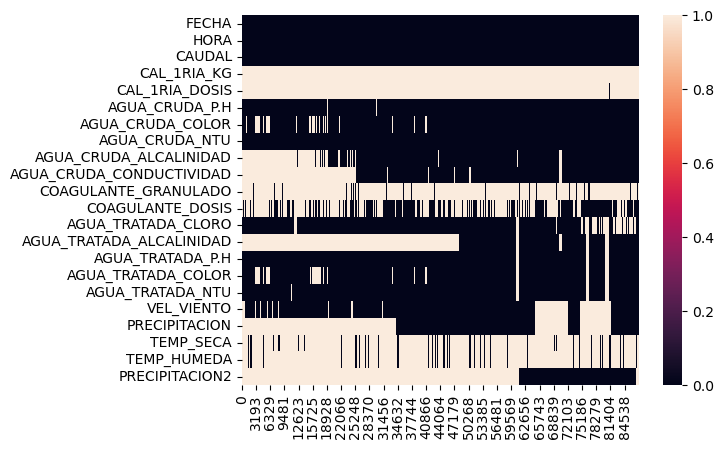

In [9]:
df.isnull().transpose().pipe(lambda df:(sns.heatmap(data=df)))
plt.show()

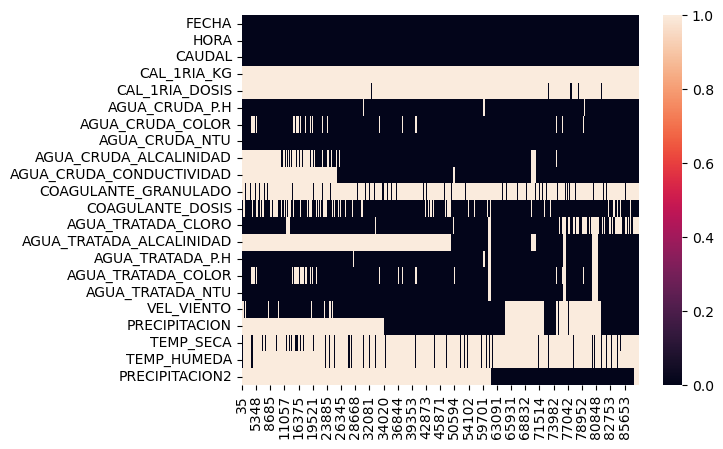

In [10]:
df_edit.isnull().transpose().pipe(lambda df:(sns.heatmap(data=df)))
plt.show()

In [11]:
pd.set_option('display.max_columns', None)
CONTEO_NULOS_AÑO = df.groupby(df['FECHA'].dt.year).apply(lambda x: x.isnull().sum())
CONTEO_NULOS_AÑO

FECHA  HORA  CAUDAL  CAL_1RIA_KG  CAL_1RIA_DOSIS  AGUA_CRUDA_P.H  \
FECHA                                                                     
2013       0     0       3         8511            8511              10   
2014       0     0       4         8568            8560              38   
2015       0     0       0         8524            8501              42   
2016       0     0       0         8635            8616              26   
2017       0     0       5         8554            8554              10   
2018       0     0       5         8663            8664               3   
2019       0     0       1         8712            8712             205   
2020       0     0       0         8577            8577               0   
2021       0     0       0         8688            8354               1   
2022       0     0       0         8591            8445              18   

       AGUA_CRUDA_COLOR  AGUA_CRUDA_NTU  AGUA_CRUDA_ALCALINIDAD  \
FECHA                                                             
2013               2481              34                    8511   
2014               1624              24                    6982   
2015                770               7                    1818   
2016                 46               3                      40   
2017                588               2                      55   
2018                 52               5                      32   
2019                 54               0                      94   
2020                  2               2                      68   
2021                151               8                     759   
2022                 22               0                       0   

       AGUA_CRUDA_CONDUCTIVIDAD  COAGULANTE_GRANULADO  COAGULANTE_DOSIS  \
FECHA                                                                     
2013                       8511                  8130              5910   
2014                       8568                  8137              5124   
2015                       7791                  8142              5632   
2016                        194                  7902              2937   
2017                        177                  7936              3778   
2018                        534                  8242              5192   
2019                          7                  8305              5693   
2020                         17                  7887              3616   
2021                        742                  7866              2779   
2022                          8                  7721              1906   

       AGUA_TRATADA_CLORO  AGUA_TRATADA_ALCALINIDAD  AGUA_TRATADA_P.H  \
FECHA                                                                   
2013                   23                      8511                18   
2014                  804                      8544                50   
2015                   74                      8525                 8   
2016                    8                      8638                 8   
2017                    5                      8554                 8   
2018                    5                      4369                 5   
2019                  756                       764               952   
2020                   32                        71                 3   
2021                 2545                      1474               719   
2022                 5452                       742               749   

       AGUA_TRATADA_COLOR  AGUA_TRATADA_NTU  VEL_VIENTO  PRECIPITACION  \
FECHA                                                                    
2013                 2489                31         874           8511   
2014                 2078                65         226           8568   
2015                  791                 7         590           8525   
2016                   47                20         111           7767   
2017                  601                 5           2              0   
2018 

In [12]:
pd.set_option('display.max_columns', None)
CONTEO_NULOS_AÑO = df_edit.groupby(df_edit['FECHA'].dt.year).apply(lambda x: x.isnull().sum())
CONTEO_NULOS_AÑO

FECHA  HORA  CAUDAL  CAL_1RIA_KG  CAL_1RIA_DOSIS  AGUA_CRUDA_P.H  \
FECHA                                                                     
2013       0     0       1         3759            3759               1   
2014       0     0       2         4463            4455              37   
2015       0     0       0         4632            4626              19   
2016       0     0       0         6442            6423              25   
2017       0     0       5         5205            5205               4   
2018       0     0       3         4385            4385               3   
2019       0     0       0         3516            3516             186   
2020       0     0       0         5206            5206               0   
2021       0     0       0         6515            6181               1   
2022       0     0       0         7425            7279              15   

       AGUA_CRUDA_COLOR  AGUA_CRUDA_NTU  AGUA_CRUDA_ALCALINIDAD  \
FECHA                                                             
2013                818              34                    3759   
2014               1082              24                    3335   
2015                428               7                     994   
2016                 30               3                      35   
2017                370               2                      55   
2018                 35               5                      17   
2019                 24               0                      70   
2020                  1               2                      15   
2021                 95               8                     577   
2022                 22               0                       0   

       AGUA_CRUDA_CONDUCTIVIDAD  COAGULANTE_GRANULADO  COAGULANTE_DOSIS  \
FECHA                                                                     
2013                       3759                  3380              1158   
2014                       4463                  4035              1019   
2015                       4147                  4256              1739   
2016                        151                  5712               744   
2017                         55                  4595               429   
2018                        347                  3967               913   
2019                          2                  3116               497   
2020                         17                  4536               245   
2021                        569                  5696               606   
2022                          8                  6559               740   

       AGUA_TRATADA_CLORO  AGUA_TRATADA_ALCALINIDAD  AGUA_TRATADA_P.H  \
FECHA                                                                   
2013                   14                      3759                 6   
2014                  502                      4461                43   
2015                   73                      4632                 7   
2016                    7                      6445                 5   
2017                    2                      5205                 0   
2018                    4                      2686                 5   
2019                  470                       470               664   
2020                   14                        18                 3   
2021                 1948                       968               394   
2022                 4731                       742               749   

       AGUA_TRATADA_COLOR  AGUA_TRATADA_NTU  VEL_VIENTO  PRECIPITACION  \
FECHA                                                                    
2013                  855                30         364           3759   
2014                 1426                53          86           4463   
2015                  467                 6         528           4632   
2016                   22                19          79           5683   
2017                  385                 1           0              0   
2018 

Es importante señalar que la cantidad de datos debería ser de 8760 para años normales y 8784 para años bisiestos. No obstante, se observa que columnas como `CAL_1RIA_KG`, `CAL_1RIA_DOSIS`, `TEMP_SECA`, `TEMP_HUMEDA` y `PRECIPITACION2` presentan una cantidad considerable de datos nulos para todos los años.

En el caso de `CAL_1RIA_KG` y `CAL_1RIA_DOSIS`, esto se debe a que la cal es un producto que solo se aplica bajo ciertas condiciones del agua. Por otra parte, la falta de datos en `TEMP_SECA` y `TEMP_HUMEDA` se atribuye a que el IDEAM recoge estos datos únicamente a tres horas específicas del día, a saber, las 7:00, las 13:00 y las 18:00. Por último, la columna `PRECIPITACION2` muestra una falta de datos en los primeros años del conjunto de datos, ya que durante este periodo no se recogieron datos por parte del IDEAM.

Por lo tanto, procederemos a eliminar las columnas `CAL_1RIA_KG`, `CAL_1RIA_DOSIS` y `PRECIPITACION2`. La decisión de eliminar las columnas relacionadas con la cal se fundamenta en su uso limitado a situaciones muy específicas, mientras que la eliminación de precipitación se justifica por la ausencia de datos durante los primeros años del conjunto de datos.

Por otro lado, se observa una carencia de datos en la mayoría de las columnas correspondientes a los años anteriores a 2017. Por lo tanto, se realizará posteriormente un análisis enfocado exclusivamente en los datos a partir de ese año.

Además, es importante considerar que para el año 2022 no se dispone de la totalidad de los datos meteorológicos, sino solamente de los correspondientes a los primeros meses.

In [13]:
HEADERS = ['FECHA', 'HORA', 'CAUDAL', 'AGUA_CRUDA_P.H', 'AGUA_CRUDA_COLOR', 'AGUA_CRUDA_NTU', 'AGUA_CRUDA_ALCALINIDAD', 
           'AGUA_CRUDA_CONDUCTIVIDAD', 'COAGULANTE_GRANULADO', 'COAGULANTE_DOSIS', 'AGUA_TRATADA_CLORO', 
           'AGUA_TRATADA_ALCALINIDAD', 'AGUA_TRATADA_P.H', 'AGUA_TRATADA_COLOR', 'AGUA_TRATADA_NTU','PRECIPITACION',
           'VEL_VIENTO','TEMP_SECA','TEMP_HUMEDA']

In [14]:
df = df[HEADERS]
df_edit = df_edit[HEADERS]

## ANÁLISIS DE VARIABLES

### ANÁLISIS UNIVARIABLE

In [15]:
# Resumen de estadística descriptiva:
df['COAGULANTE_DOSIS'].describe()

count    43483.000000
mean        25.775268
std          5.845216
min         15.000000
25%         20.000000
50%         25.000000
75%         30.000000
max         50.000000
Name: COAGULANTE_DOSIS, dtype: float64

In [16]:
# Resumen de estadística descriptiva:
df_edit['COAGULANTE_DOSIS'].describe()

count    43483.000000
mean        25.775268
std          5.845216
min         15.000000
25%         20.000000
50%         25.000000
75%         30.000000
max         50.000000
Name: COAGULANTE_DOSIS, dtype: float64

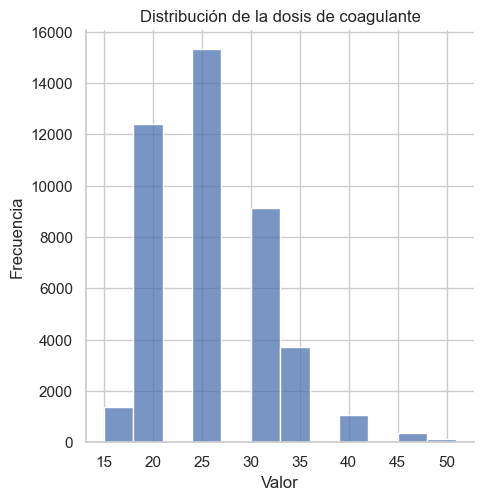

In [17]:
# Configurar Seaborn
sns.set(style="whitegrid")

# Crear displot
ax = sns.displot(df['COAGULANTE_DOSIS'], kde=False, binwidth=3)

# Configurar título y etiquetas
ax.set(title="Distribución de la dosis de coagulante", xlabel="Valor", ylabel="Frecuencia")

# Mostrar el gráfico
plt.show()

In [18]:
count = df['COAGULANTE_DOSIS'].value_counts()
count

25.0    15303
20.0    12396
30.0     9107
35.0     3690
15.0     1345
40.0     1063
45.0      350
50.0      138
29.0       14
33.0       12
16.0       11
36.0       10
23.0        9
28.0        9
32.0        7
38.0        4
22.0        3
26.0        3
21.0        2
44.0        2
27.0        2
17.0        1
31.0        1
37.0        1
Name: COAGULANTE_DOSIS, dtype: int64

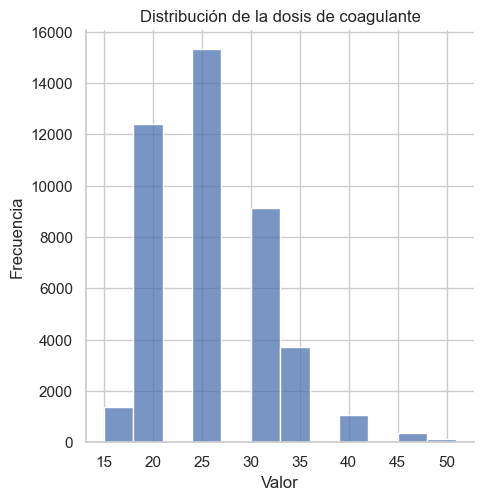

In [19]:
# Configurar Seaborn
sns.set(style="whitegrid")

# Crear displot
ax = sns.displot(df_edit['COAGULANTE_DOSIS'], kde=False, binwidth=3)

# Configurar título y etiquetas
ax.set(title="Distribución de la dosis de coagulante", xlabel="Valor", ylabel="Frecuencia")

# Mostrar el gráfico
plt.show()

In [20]:
count = df_edit['COAGULANTE_DOSIS'].value_counts()
count

25.0    15303
20.0    12396
30.0     9107
35.0     3690
15.0     1345
40.0     1063
45.0      350
50.0      138
29.0       14
33.0       12
16.0       11
36.0       10
23.0        9
28.0        9
32.0        7
38.0        4
22.0        3
26.0        3
21.0        2
44.0        2
27.0        2
17.0        1
31.0        1
37.0        1
Name: COAGULANTE_DOSIS, dtype: int64

In [21]:
# Asimetría y curtosis:
print("Skewness: %f" % df['COAGULANTE_DOSIS'].skew())
print("Kurtosis: %f" % df['COAGULANTE_DOSIS'].kurt())

Skewness: 0.810838
Kurtosis: 0.960109


In [22]:
# Asimetría y curtosis:
print("Skewness: %f" % df_edit['COAGULANTE_DOSIS'].skew())
print("Kurtosis: %f" % df_edit['COAGULANTE_DOSIS'].kurt())

Skewness: 0.810838
Kurtosis: 0.960109


### RELACIÓN  CON DEMAS VARIABLES

In [23]:
def trend(df,start_year,end_year,parameter):
    fig, axs = plt.subplots(2, 1, figsize=(12, 12), sharex=True)  # crea dos subplots con el mismo eje x
    df_without_nan_ts = df.dropna(subset=['TEMP_SECA'])
    df_without_nan_th = df.dropna(subset=['TEMP_HUMEDA'])
    for year in range(start_year, end_year):
        data_year = df[df['FECHA'].dt.year == year]
        df_without_nan_year_ts = df_without_nan_ts[df_without_nan_ts['FECHA'].dt.year == year]
        df_without_nan_year_th = df_without_nan_th[df_without_nan_th['FECHA'].dt.year == year]
        if parameter == 'TEMP_SECA':
            axs[0].plot(df_without_nan_year_ts['FECHA'], df_without_nan_year_ts[parameter], label=year)
            axs[1].plot(data_year['FECHA'], data_year['COAGULANTE_DOSIS'], label=year)
        if parameter == 'TEMP_HUMEDA':
            axs[0].plot(df_without_nan_year_th['FECHA'], df_without_nan_year_th[parameter], label=year)
            axs[1].plot(data_year['FECHA'], data_year['COAGULANTE_DOSIS'], label=year)
        else:
            axs[0].plot(data_year['FECHA'], data_year[parameter], label=year)  # grafica en el primer subplot
            axs[1].plot(data_year['FECHA'], data_year['COAGULANTE_DOSIS'], label=year)  # grafica en el segundo subplot

    axs[0].set_ylabel(parameter)
    axs[0].set_title(f'TENDENCIA TEMPORAL DE {parameter}')
    axs[0].legend(title='Año')

    axs[1].set_xlabel('FECHA')
    axs[1].set_ylabel('COAGULANTE_DOSIS')
    axs[1].set_title('TENDENCIA TEMPORAL DE COAGULANTE_DOSIS')
    axs[1].legend(title='Año')

    plt.tight_layout()  # ajusta el espaciado entre subplots
    plt.show()

**CAUDAL**

In [24]:
# Resumen de estadística descriptiva:
df['CAUDAL'].describe()

count    86032.000000
mean       600.777030
std         74.031424
min        200.000000
25%        550.000000
50%        605.000000
75%        651.000000
max        800.000000
Name: CAUDAL, dtype: float64

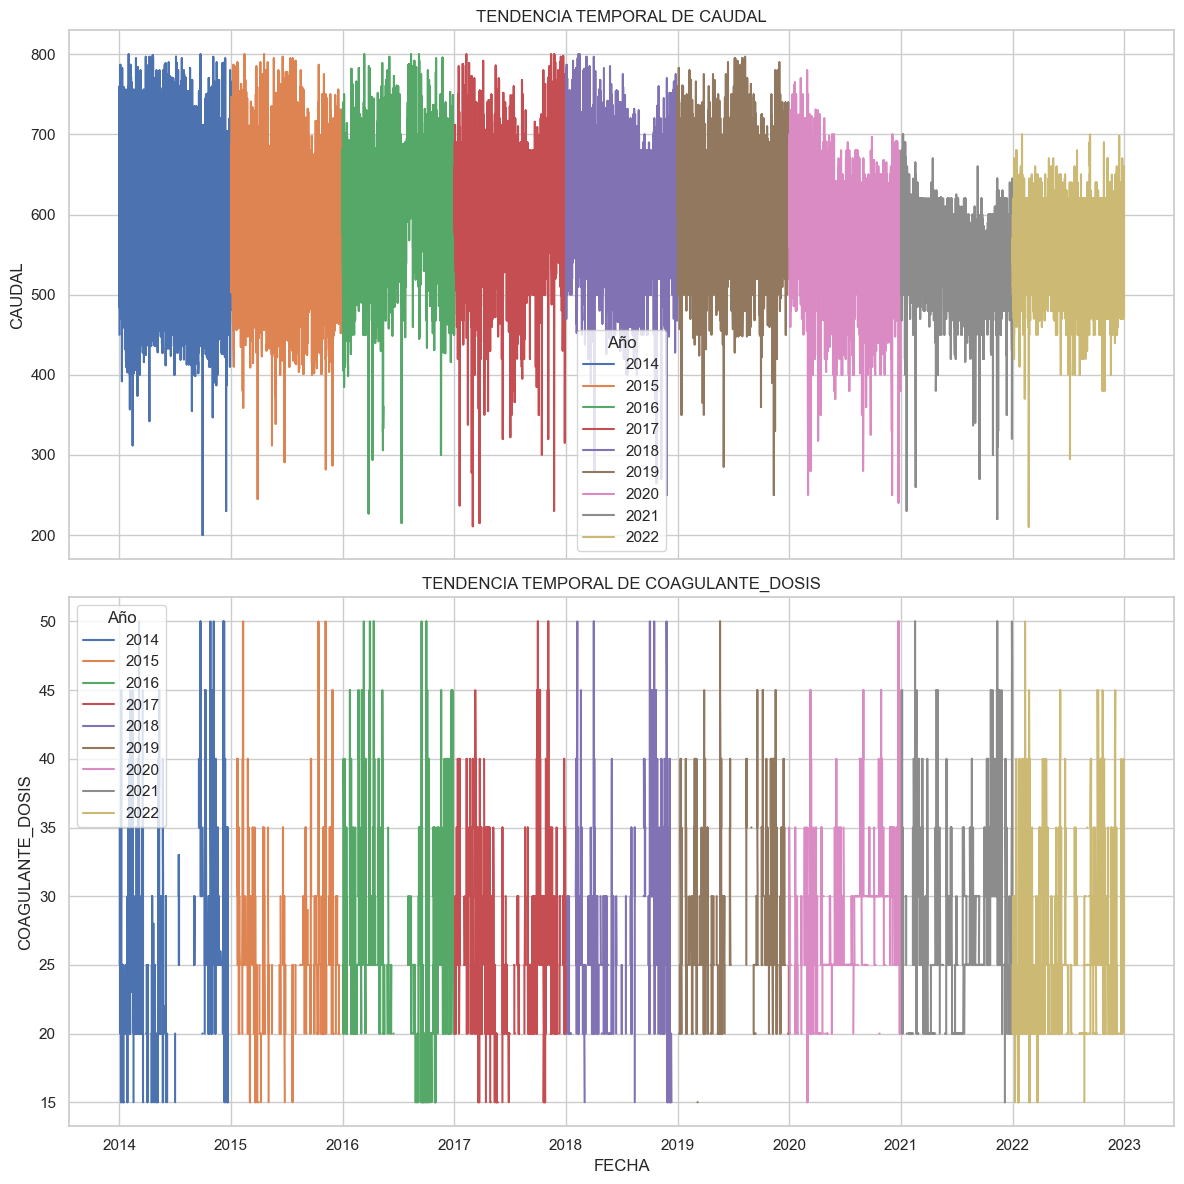

In [25]:
trend(df,2014,2023,'CAUDAL')

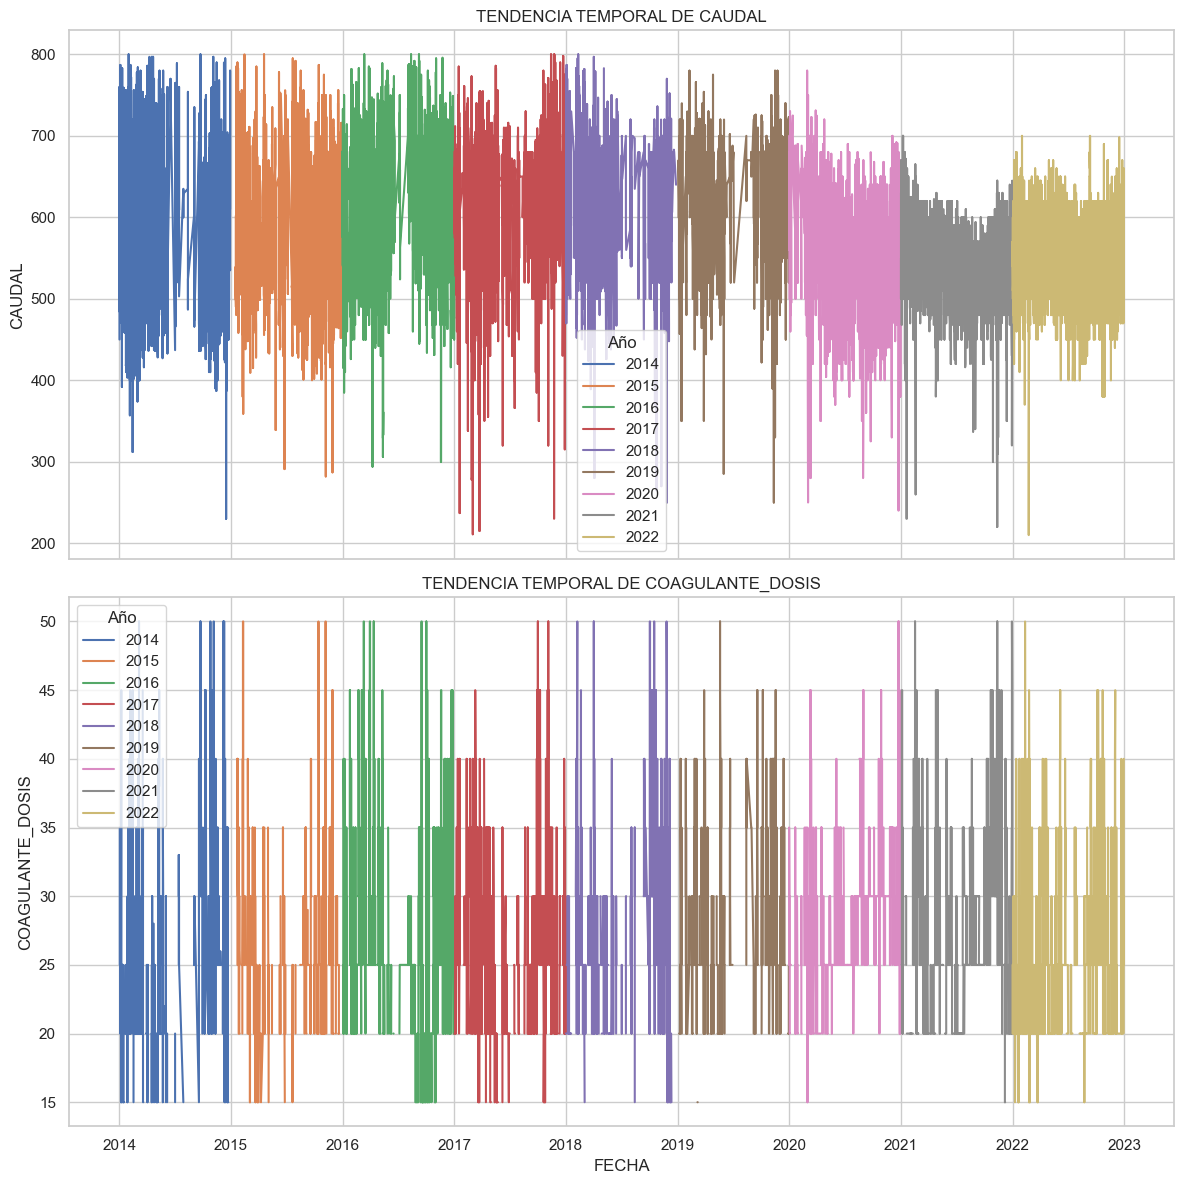

In [26]:
trend(df_edit,2014,2023,'CAUDAL')

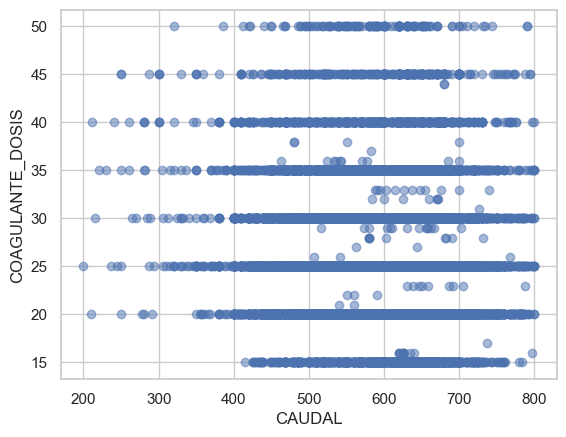

In [27]:
# Diagrama de dispersión CAUDAL/COAGULANTE_DOSIS:
plt.scatter(x=df['CAUDAL'], y=df['COAGULANTE_DOSIS'], alpha=0.5)
plt.xlabel('CAUDAL')
plt.ylabel('COAGULANTE_DOSIS')
plt.show()

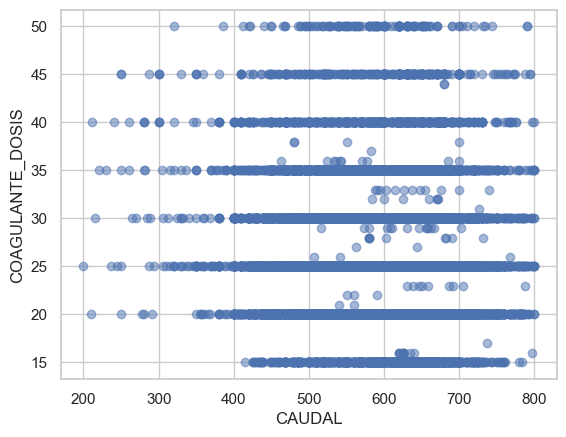

In [28]:
# Diagrama de dispersión CAUDAL/COAGULANTE_DOSIS:
plt.scatter(x=df_edit['CAUDAL'], y=df_edit['COAGULANTE_DOSIS'], alpha=0.5)
plt.xlabel('CAUDAL')
plt.ylabel('COAGULANTE_DOSIS')
plt.show()

En el análisis de tendencia temporal de la variable `CAUDAL`, se puede observar que existe una falta de datos en el año 2014. Además, se evidencia un cambio en la tendencia durante los años 2021 y 2022 en comparación con años anteriores. En estos últimos años, se observa que el caudal presenta únicamente valores máximos de 700, lo que resulta en una disminución en el rango general en el que se mantenía anteriormente.

En cuanto a la relación entre el caudal y la dosis de coagulante, no se puede identificar una relación lineal clara.

**AGUA_CRUDA_P.H**

In [29]:
# Resumen de estadística descriptiva:
df['AGUA_CRUDA_P.H'].describe()

count    85697.000000
mean         7.582736
std          0.285371
min          6.100000
25%          7.400000
50%          7.600000
75%          7.800000
max          9.700000
Name: AGUA_CRUDA_P.H, dtype: float64

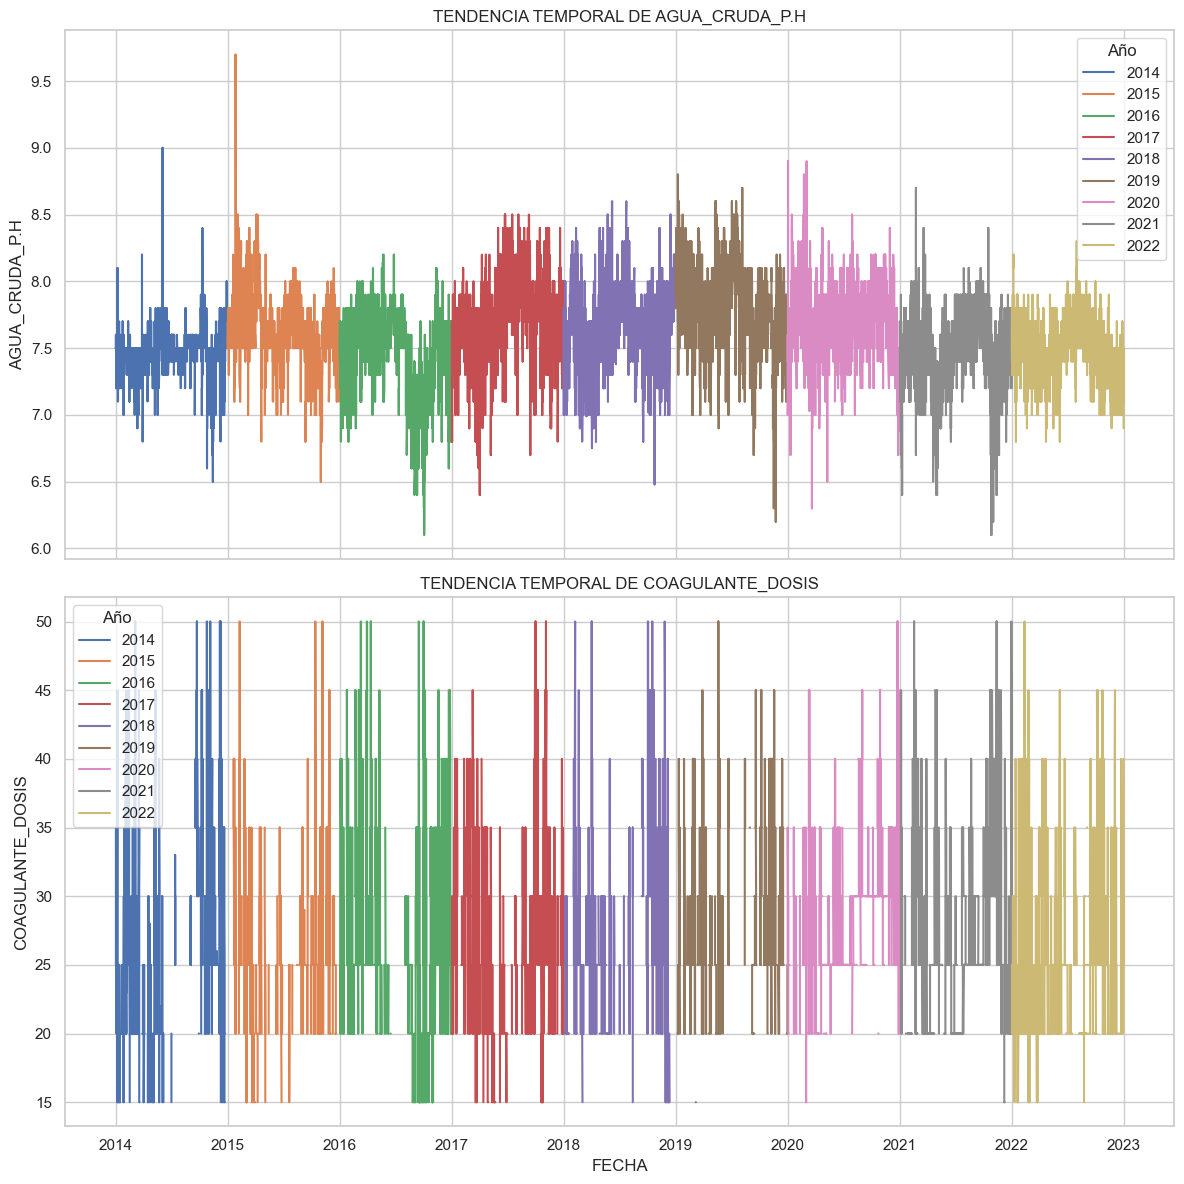

In [30]:
trend(df,2014,2023,'AGUA_CRUDA_P.H')

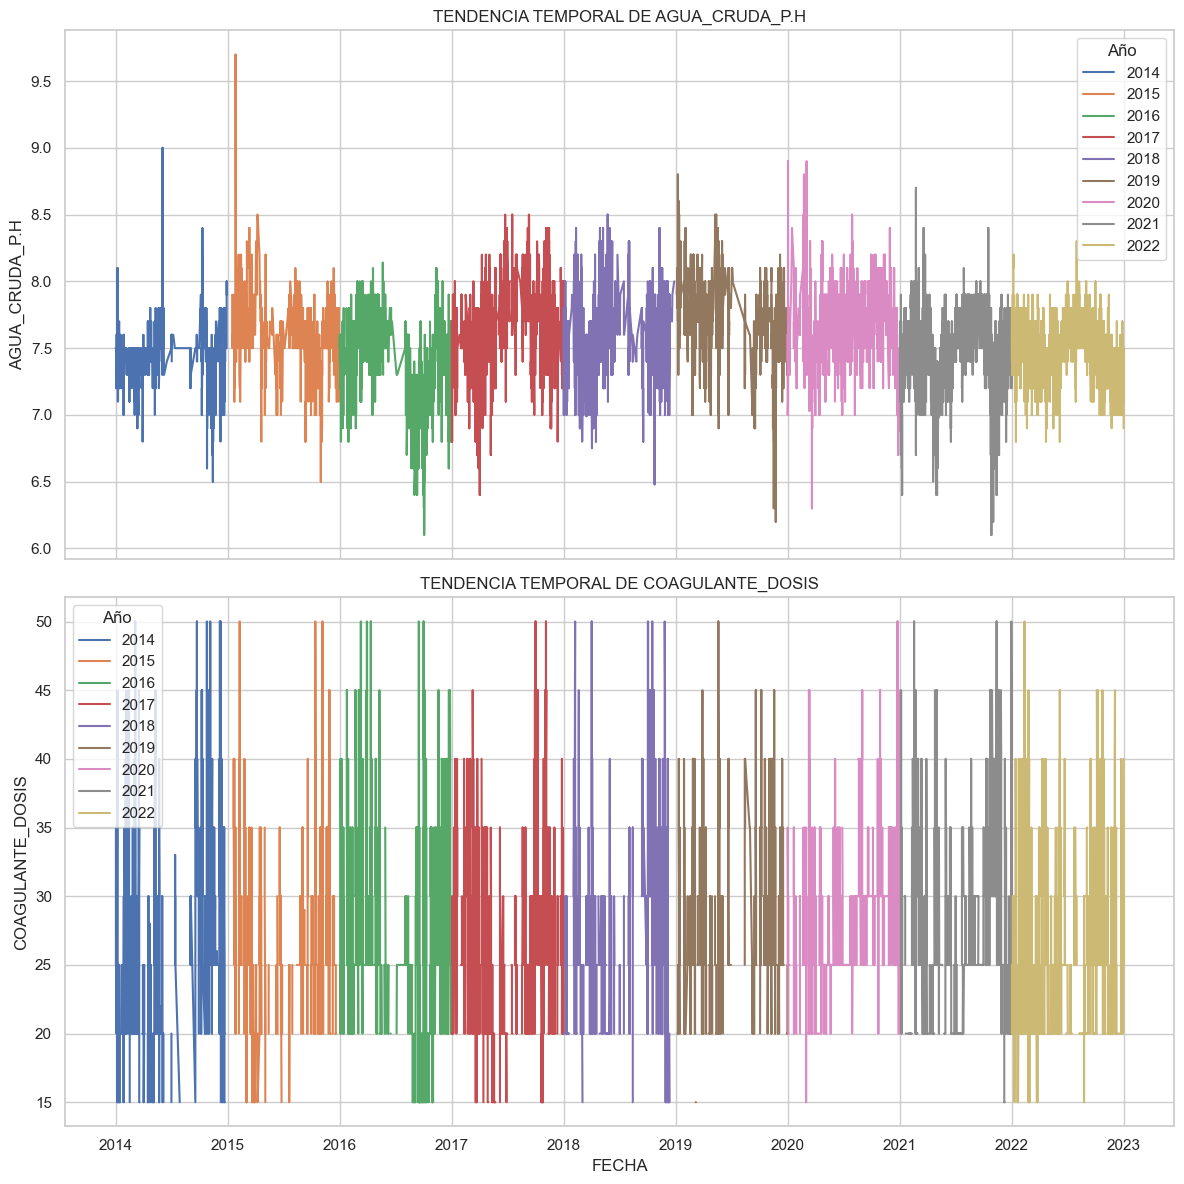

In [31]:
trend(df_edit,2014,2023,'AGUA_CRUDA_P.H')

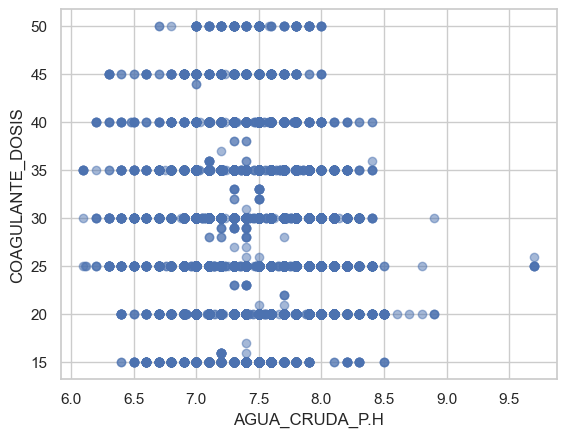

In [32]:
plt.scatter(x=df['AGUA_CRUDA_P.H'], y=df['COAGULANTE_DOSIS'], alpha=0.5)
plt.xlabel('AGUA_CRUDA_P.H')
plt.ylabel('COAGULANTE_DOSIS')
plt.show()

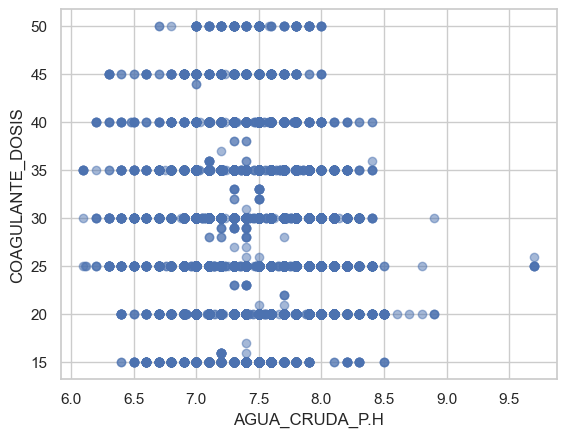

In [33]:
plt.scatter(x=df_edit['AGUA_CRUDA_P.H'], y=df_edit['COAGULANTE_DOSIS'], alpha=0.5)
plt.xlabel('AGUA_CRUDA_P.H')
plt.ylabel('COAGULANTE_DOSIS')
plt.show()

En el análisis temporal de la variable `AGUA_CRUDA_P.H`, se observa una falta de datos para el año 2014. Además, se puede notar que los años 2017, 2018, 2019 y 2020 presentan valores ligeramente más altos en comparación con los demás años.

En cuanto a la relación entre la variable `AGUA_CRUDA_P.H` y la dosis de coagulante en la tendencia temporal, se observa que durante los meses de julio y agosto, cuando el pH es más alto, la dosis tiende a ser más baja e incluso no se aplica. Sin embargo, al examinar el gráfico de dispersión, no se puede identificar una relación clara entre estas variables.

Por lo tanto, aunque existen patrones en los valores de pH y la dosis de coagulante en función del tiempo, no se puede establecer una relación directa entre ambos según la representación gráfica.

**AGUA_CRUDA_COLOR**

In [34]:
# Resumen de estadística descriptiva:
df['AGUA_CRUDA_COLOR'].describe()

count    80260.000000
mean        22.547765
std         40.627106
min          0.000000
25%          8.000000
50%         11.200000
75%         19.900000
max        498.000000
Name: AGUA_CRUDA_COLOR, dtype: float64

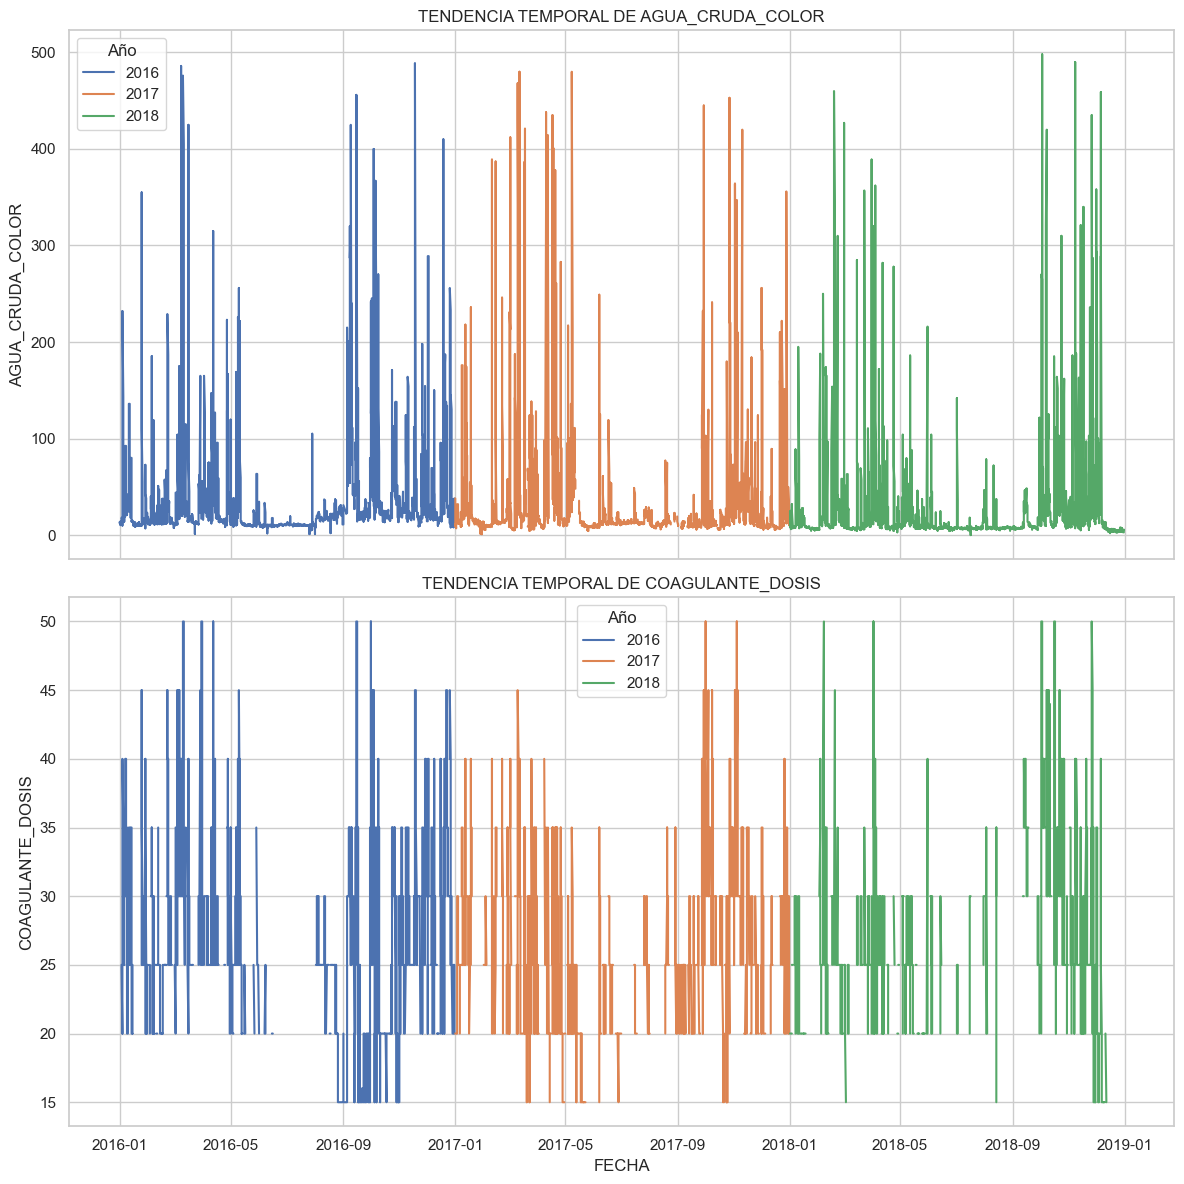

In [35]:
trend(df,2016,2019,'AGUA_CRUDA_COLOR')

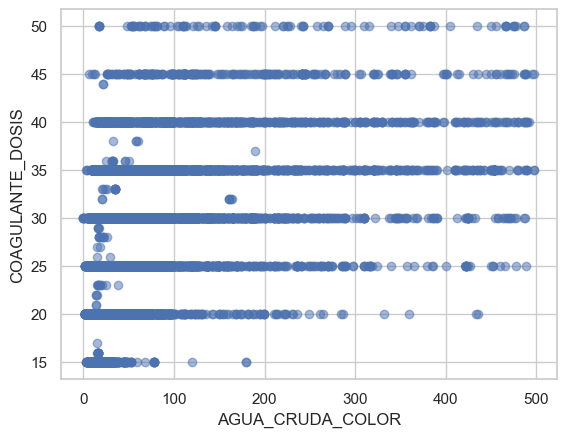

In [36]:
# Diagrama de dispersión AGUA_CRUDA_COLOR/COAGULANTE_DOSIS:
plt.scatter(x=df['AGUA_CRUDA_COLOR'], y=df['COAGULANTE_DOSIS'], alpha=0.5)
plt.xlabel('AGUA_CRUDA_COLOR')
plt.ylabel('COAGULANTE_DOSIS')
plt.show()

En cuanto al parámetro `AGUA_CRUDA_COLOR`, se observa una falta de datos para el año 2014. Sin embargo, en los años 2020, 2021 y 2022 se observa una diferencia en la tendencia durante los meses de junio a septiembre. En años anteriores, se solía observar una disminución en el color durante esos meses, pero en estos años se aprecian valores ligeramente más altos. 

Al analizar la relación con la dosis de coagulante, se nota que durante los meses en los que el color disminuye, la dosis también tiende a disminuir. Al examinar el gráfico de dispersión, se puede observar una tendencia creciente de los datos de izquierda a derecha, lo que sugiere una relación lineal suave entre las variables.

**AGUA_CRUDA_NTU**

In [37]:
# Resumen de estadística descriptiva:
df['AGUA_CRUDA_NTU'].describe()

count    85965.000000
mean        11.182824
std         33.507430
min          0.400000
25%          2.200000
50%          3.000000
75%          6.500000
max        795.000000
Name: AGUA_CRUDA_NTU, dtype: float64

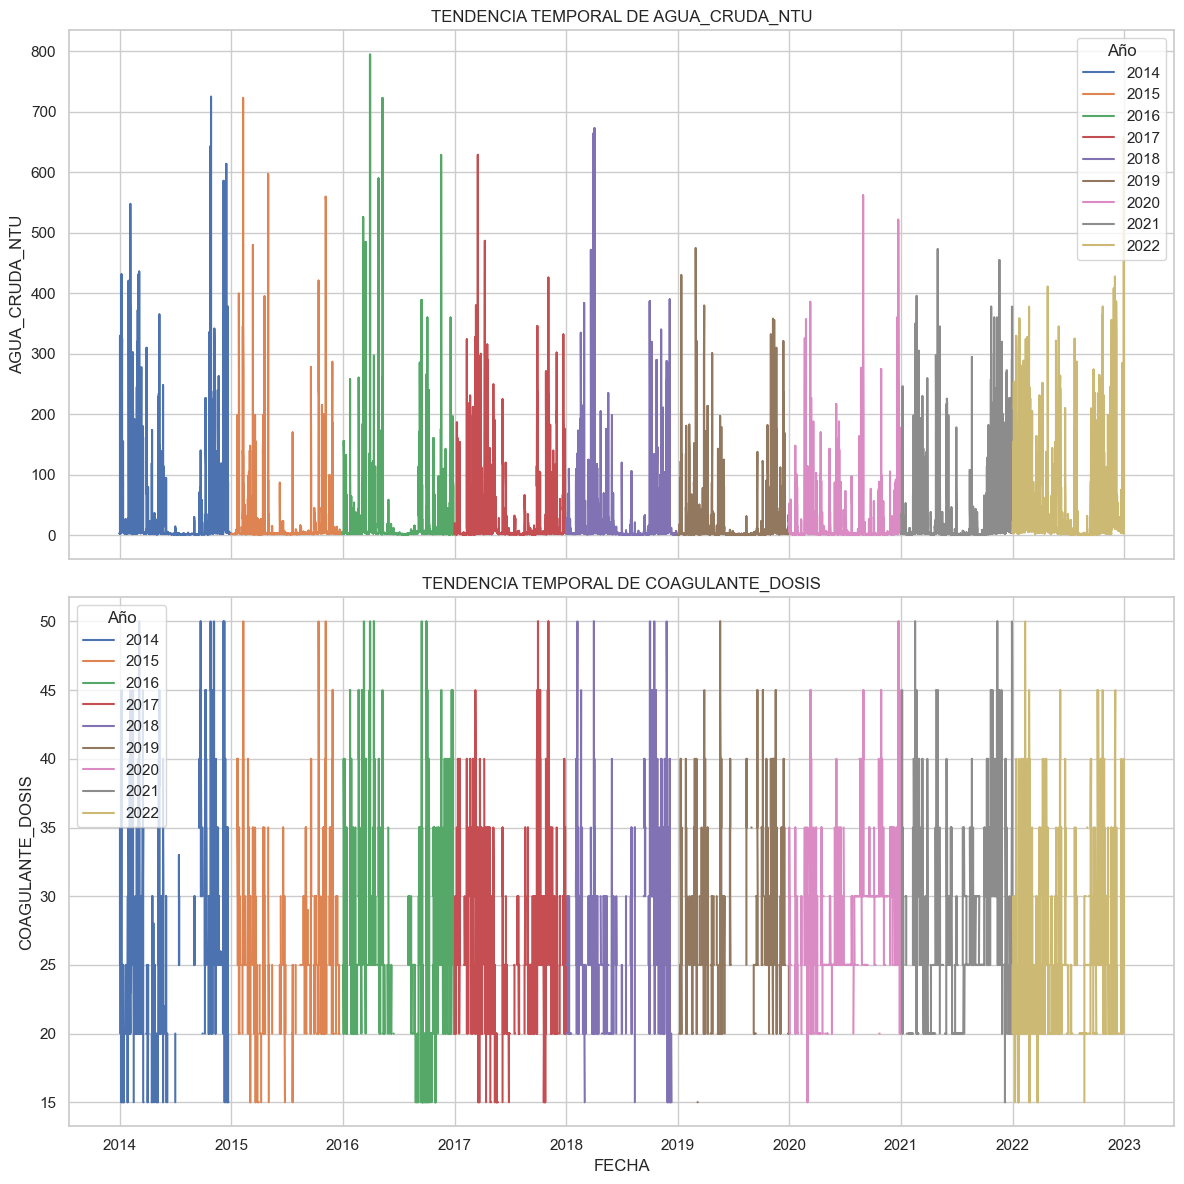

In [38]:
trend(df,2014,2023,'AGUA_CRUDA_NTU')

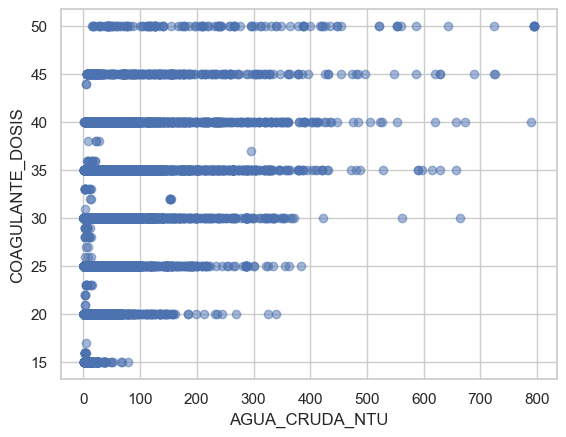

In [39]:
# Diagrama de dispersión AGUA_CRUDA_NTU/COAGULANTE_DOSIS:
plt.scatter(x=df['AGUA_CRUDA_NTU'], y=df['COAGULANTE_DOSIS'], alpha=0.5)
plt.xlabel('AGUA_CRUDA_NTU')
plt.ylabel('COAGULANTE_DOSIS')
plt.show()

Al examinar las tendencias temporales y analizar la relación con la variable de dosis de coagulante, se observa una consistencia similar a la evidenciada con la variable de color. Durante los meses de junio a septiembre, se mantiene la misma tendencia y se aprecia un incremento de izquierda a derecha en el gráfico de dispersión. Sin embargo, se nota que la dispersión de los datos en el gráfico de dispersión es ligeramente mayor en comparación con la variable de color. Esto nos lleva a concluir que la relación lineal entre la dosis de coagulante y la variable de turbiedad es un poco menos pronunciada en comparación con la relación entre la dosis de coagulante y el color.

**AGUA_CRUDA_ALCALINIDAD**

In [40]:
# Resumen de estadística descriptiva:
df['AGUA_CRUDA_ALCALINIDAD'].describe()

count    67691.000000
mean        33.272096
std          6.630669
min          0.000000
25%         29.000000
50%         34.000000
75%         38.000000
max         90.800000
Name: AGUA_CRUDA_ALCALINIDAD, dtype: float64

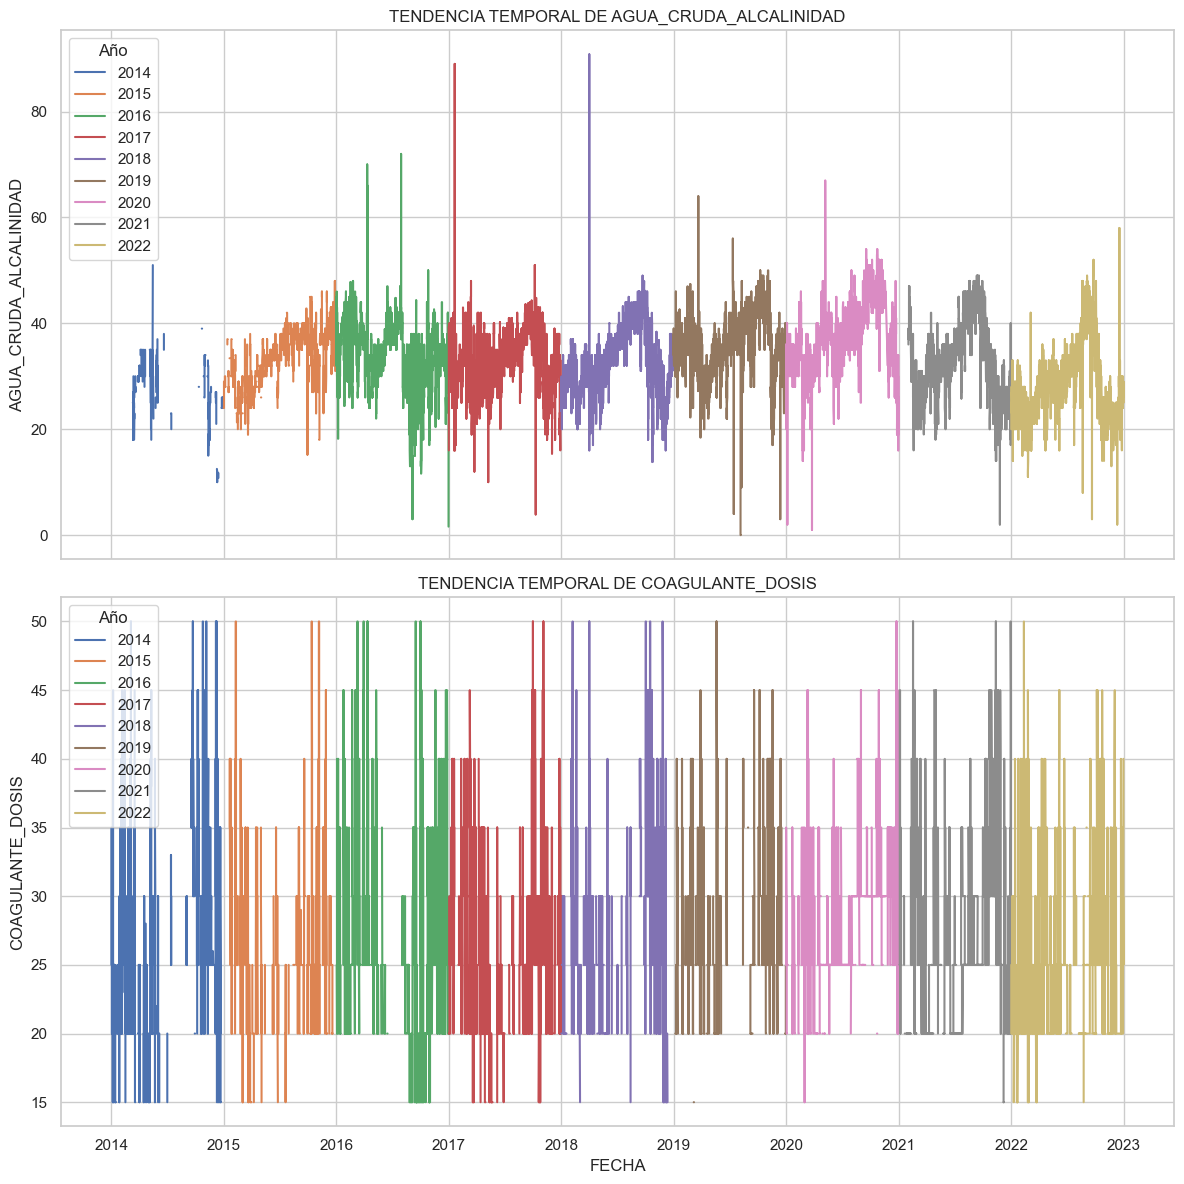

In [41]:
trend(df,2014,2023,'AGUA_CRUDA_ALCALINIDAD')

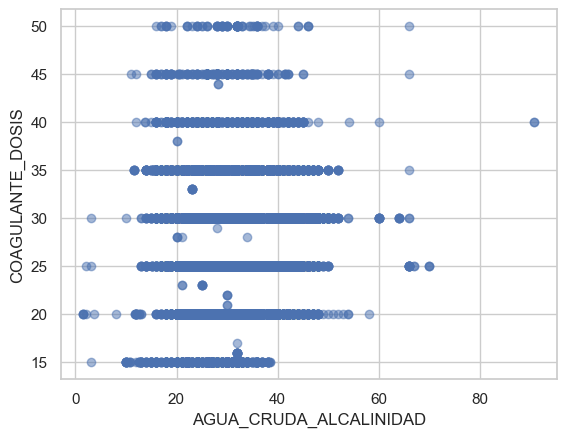

In [42]:
# Diagrama de dispersión AGUA_CRUDA_ALCALINIDAD/COAGULANTE_DOSIS:
plt.scatter(x=df['AGUA_CRUDA_ALCALINIDAD'], y=df['COAGULANTE_DOSIS'], alpha=0.5)
plt.xlabel('AGUA_CRUDA_ALCALINIDAD')
plt.ylabel('COAGULANTE_DOSIS')
plt.show()

Al analizar la tendencia temporal de la variable de alcalinidad, se observa que durante los meses de diciembre a junio, la alcalinidad se mantiene en valores más bajos, mientras que en los meses restantes tiende a aumentar. En comparación con la dosis de coagulante, se nota que para los meses de septiembre a junio, la dosis tiende a ser alta, mientras que para los meses de junio a septiembre disminuye. Sin embargo, al examinar el gráfico de dispersión, no se puede apreciar de manera clara una relación lineal entre las variables.

**AGUA_CRUDA_CONDUCTIVIDAD**

In [43]:
# Resumen de estadística descriptiva:
df['AGUA_CRUDA_CONDUCTIVIDAD'].describe()

count    59501.000000
mean        72.099495
std         24.256839
min          0.000000
25%         57.000000
50%         69.700000
75%         81.600000
max        476.000000
Name: AGUA_CRUDA_CONDUCTIVIDAD, dtype: float64

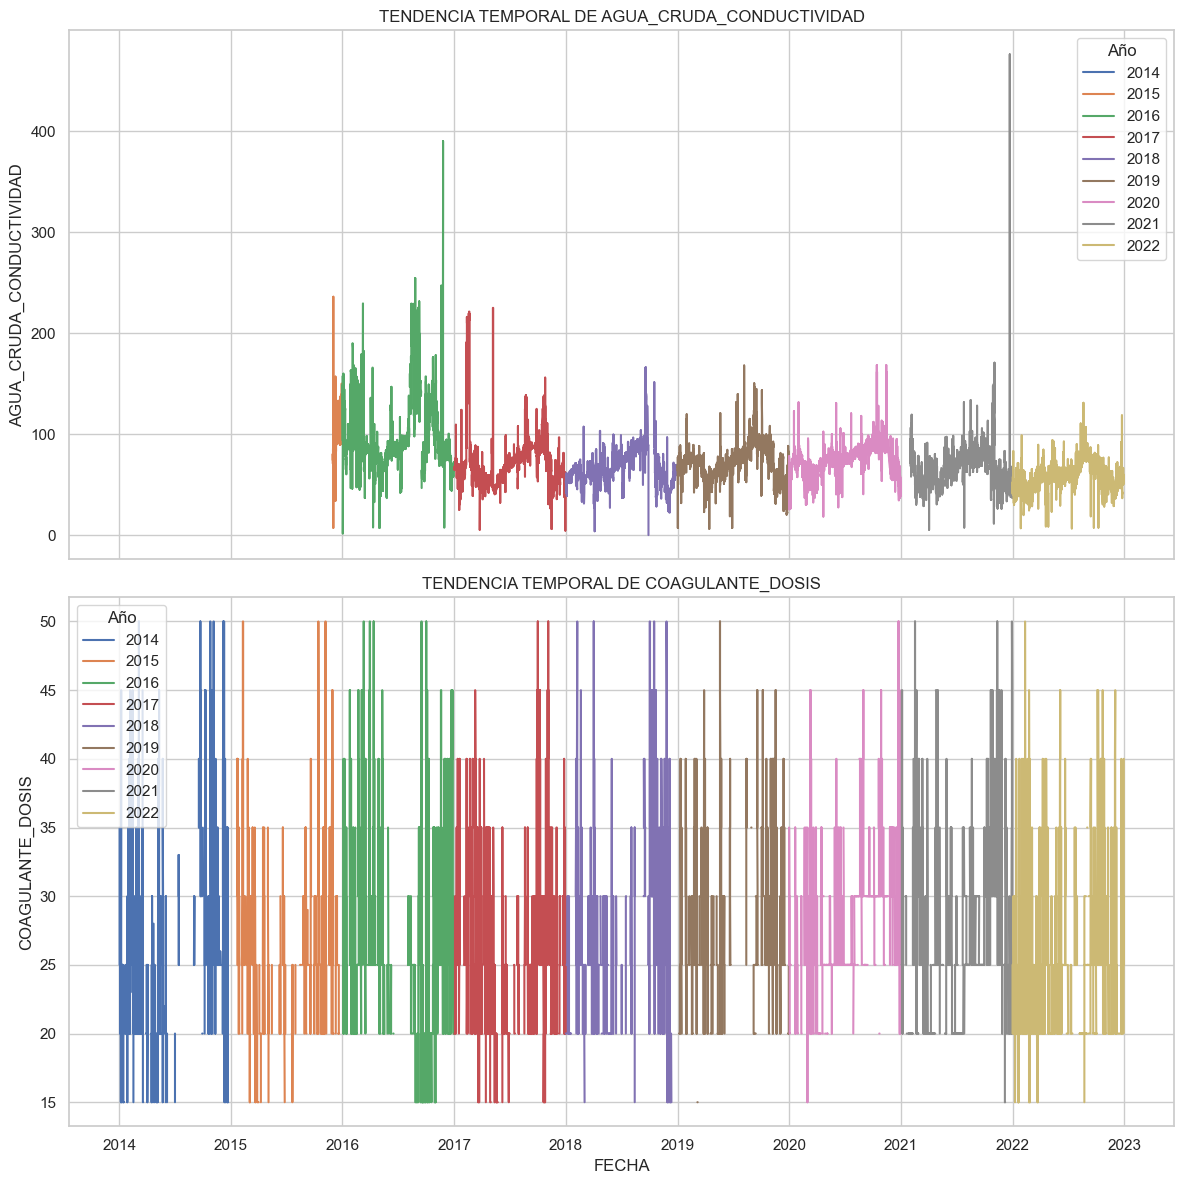

In [44]:
trend(df,2014,2023,'AGUA_CRUDA_CONDUCTIVIDAD')

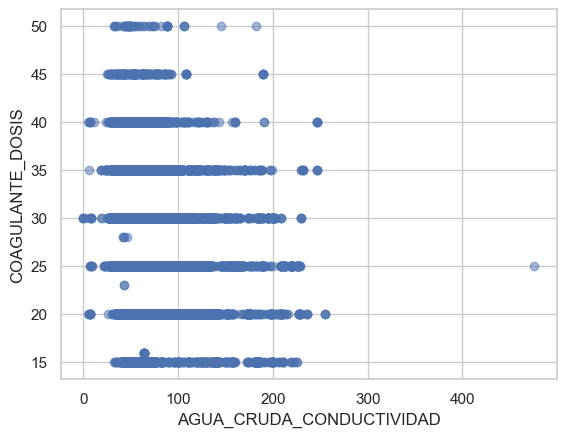

In [45]:
# Diagrama de dispersión AGUA_CRUDA_CONDUCTIVIDAD/COAGULANTE_DOSIS:
plt.scatter(x=df['AGUA_CRUDA_CONDUCTIVIDAD'], y=df['COAGULANTE_DOSIS'], alpha=0.5)
plt.xlabel('AGUA_CRUDA_CONDUCTIVIDAD')
plt.ylabel('COAGULANTE_DOSIS')
plt.show()

Al analizar la variable de conductividad, se observa una tendencia temporal similar a la de la alcalinidad, con un incremento de la variable durante los meses de junio a noviembre. Sin embargo, en lo que respecta a la relación con la variable de dosis de coagulante, no se puede identificar una relación clara en el gráfico de dispersión.

**VEL_VIENTO**

In [46]:
# Resumen de estadística descriptiva:
df['VEL_VIENTO'].describe()

count    71055.000000
mean         1.560298
std          0.917223
min          0.241667
25%          1.008333
50%          1.375000
75%          1.841667
max         10.208333
Name: VEL_VIENTO, dtype: float64

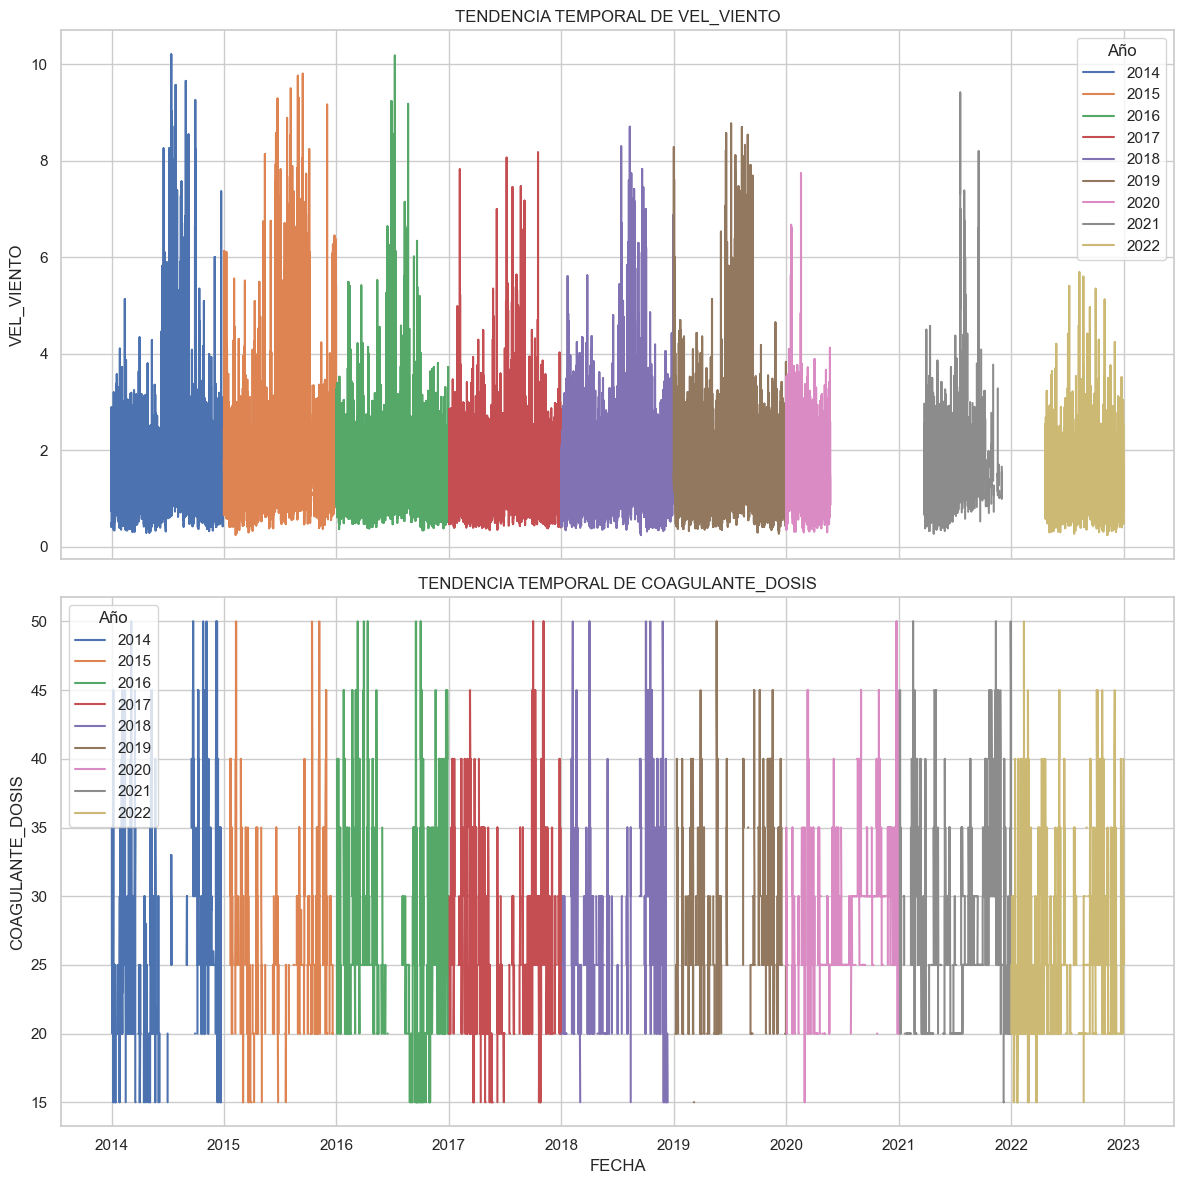

In [47]:
trend(df,2014,2023,'VEL_VIENTO')

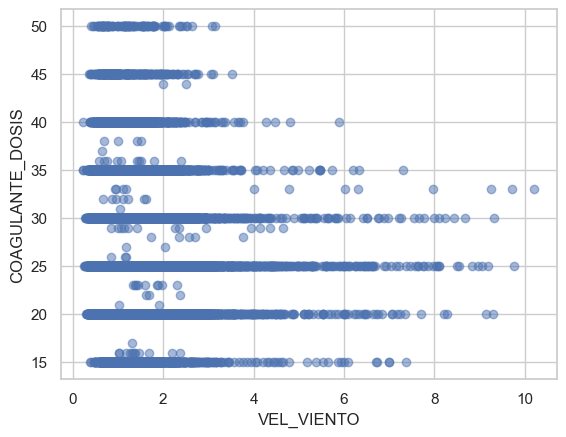

In [48]:
# Diagrama de dispersión VEL_VIENTO/COAGULANTE_DOSIS:
plt.scatter(x=df['VEL_VIENTO'], y=df['COAGULANTE_DOSIS'], alpha=0.5)
plt.xlabel('VEL_VIENTO')
plt.ylabel('COAGULANTE_DOSIS')
plt.show()

Al analizar el comportamiento de la variable "velocidad del viento" a lo largo del tiempo, se observa una tendencia en la cual se registran picos más altos durante los meses de junio a septiembre. Por otro lado, se observa una tendencia opuesta en la dosis de coagulante, donde los valores tienden a ser más bajos durante esos mismos meses. Sin embargo, al examinar el gráfico de dispersión entre ambas variables, no se evidencia una relación clara entre ellas. Tambien se puede evidenciar la falta de datos en algunos tramos de los últimos 3 años, lo que nos lleva a pensar que hubo problemas en la medición en la estación.

**PRECIPITACION**

In [49]:
# Resumen de estadística descriptiva:
df['PRECIPITACION'].describe()

count    39491.000000
mean         0.110311
std          0.967689
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         47.900000
Name: PRECIPITACION, dtype: float64

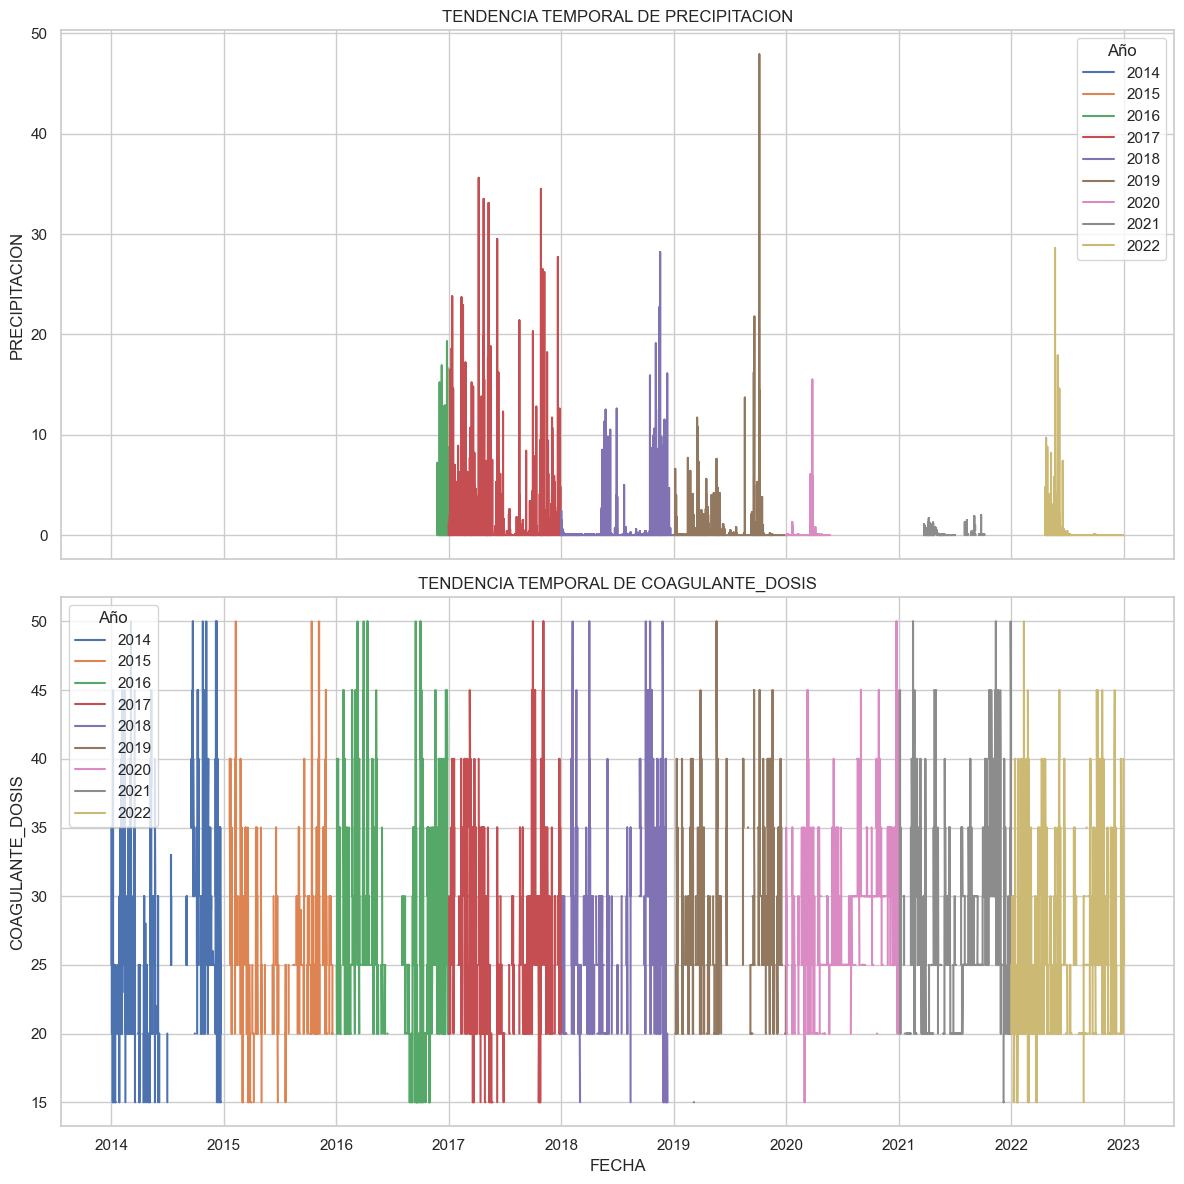

In [50]:
trend(df,2014,2023,'PRECIPITACION')

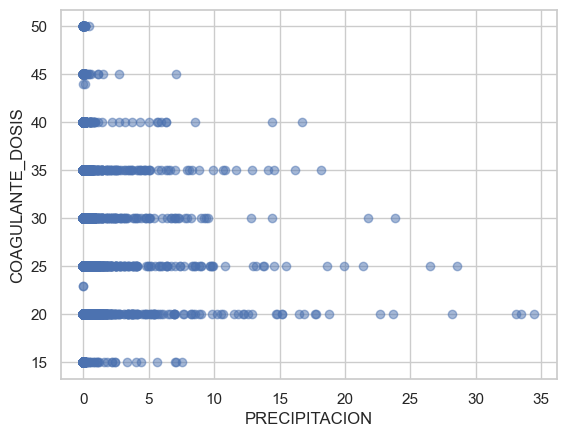

In [51]:
# Diagrama de dispersión VEL_VIENTO/COAGULANTE_DOSIS:
plt.scatter(x=df['PRECIPITACION'], y=df['COAGULANTE_DOSIS'], alpha=0.5)
plt.xlabel('PRECIPITACION')
plt.ylabel('COAGULANTE_DOSIS')
plt.show()

Al analizar la variable de precipitación, se observa una gran falta de datos a lo largo de los años. Es evidente que en los últimos tres años, la mayoría de los valores de precipitación tienden a ser cero. Esto nos lleva a sospechar que puede haber habido problemas con la estación de medición durante esos años. Además, al comparar estos datos con los de la velocidad del viento, se nota que esta tendencia se encuentra en los mismos períodos en los que no se registraron mediciones de velocidad del viento. Es importante destacar que estos datos fueron recolectados en la misma estación. Debido a esta falta de datos, no es posible identificar una relación clara con la variable de dosis de coagulante.

**TEMP_SECA**

In [52]:
# Resumen de estadística descriptiva:
df['TEMP_SECA'].describe()

count    9596.000000
mean       19.569883
std         3.949391
min         8.400000
25%        16.000000
50%        19.550000
75%        23.000000
max        30.000000
Name: TEMP_SECA, dtype: float64

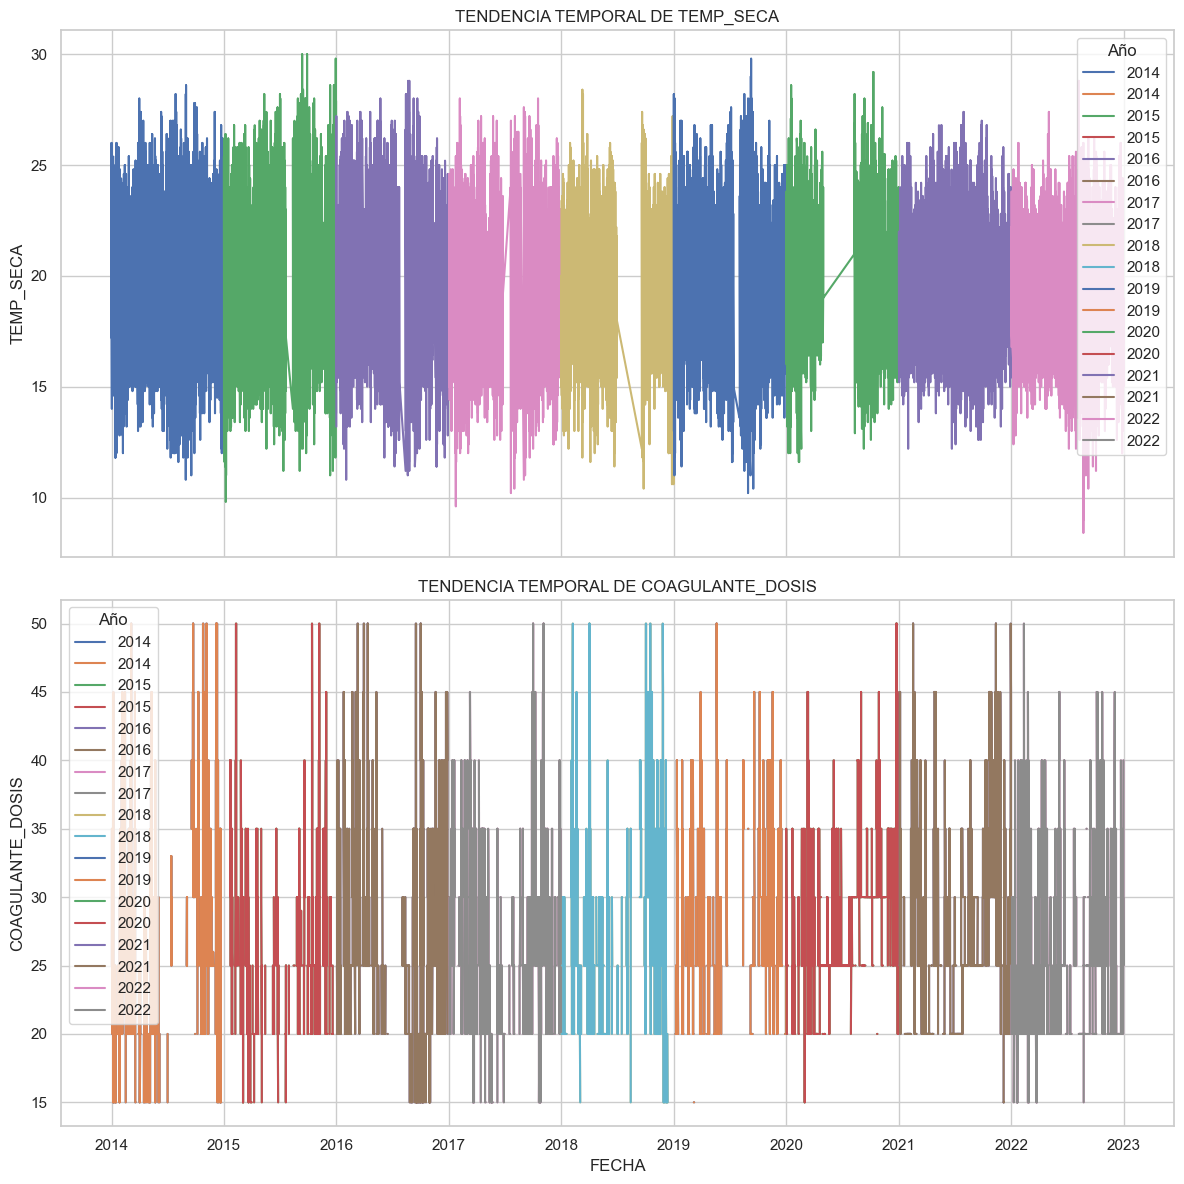

In [53]:
trend(df,2014,2023,'TEMP_SECA')

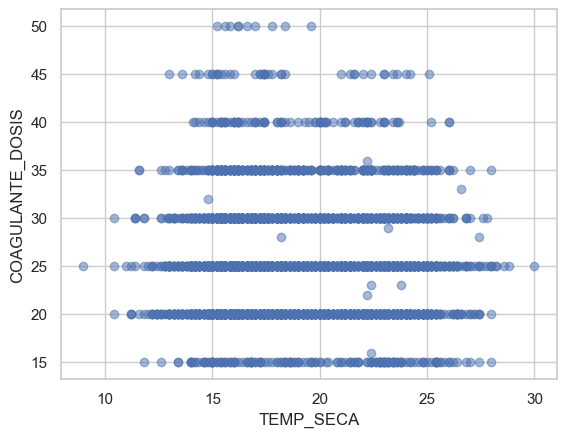

In [54]:
# Diagrama de dispersión VEL_VIENTO/COAGULANTE_DOSIS:
plt.scatter(x=df['TEMP_SECA'], y=df['COAGULANTE_DOSIS'], alpha=0.5)
plt.xlabel('TEMP_SECA')
plt.ylabel('COAGULANTE_DOSIS')
plt.show()

**TEMP_HUMEDA**

In [55]:
# Resumen de estadística descriptiva:
df['TEMP_HUMEDA'].describe()

count    6801.000000
mean       16.944699
std         2.479150
min         8.600000
25%        15.300000
50%        17.000000
75%        18.200000
max        28.000000
Name: TEMP_HUMEDA, dtype: float64

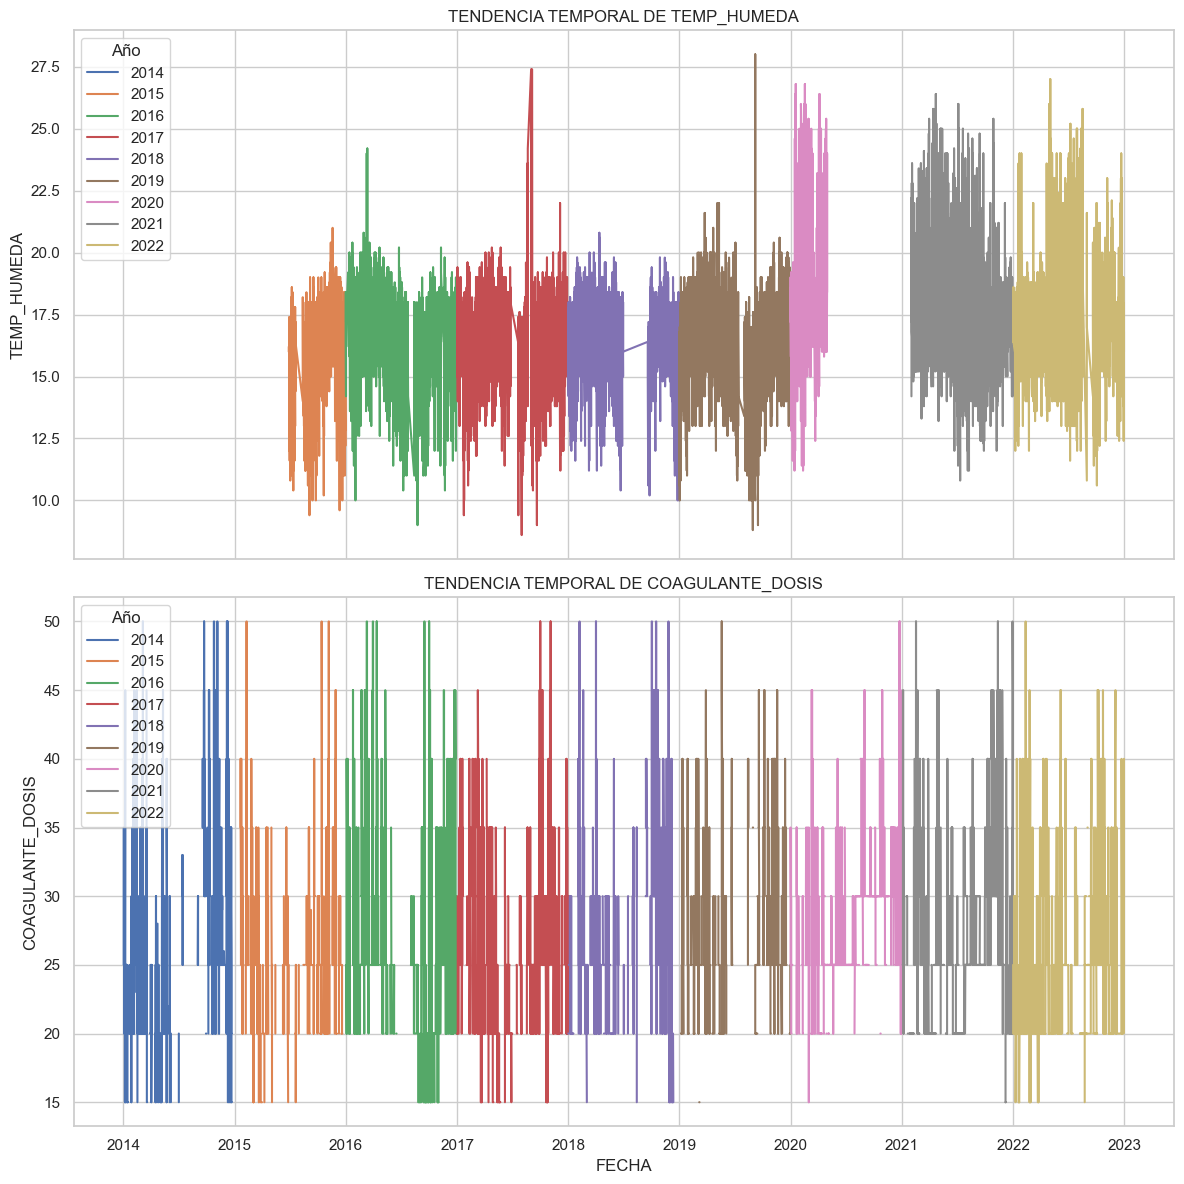

In [56]:
trend(df,2014,2023,'TEMP_HUMEDA')

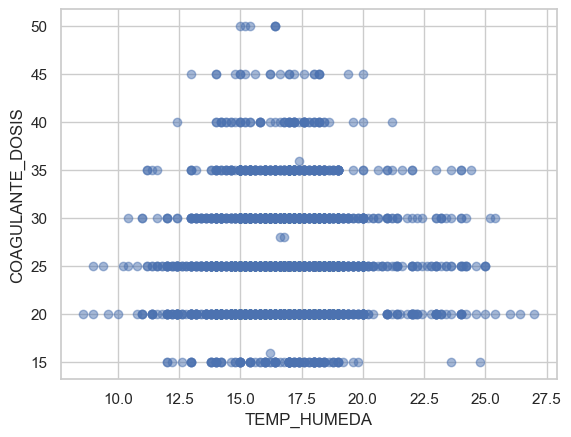

In [57]:
# Diagrama de dispersión VEL_VIENTO/COAGULANTE_DOSIS:
plt.scatter(x=df['TEMP_HUMEDA'], y=df['COAGULANTE_DOSIS'], alpha=0.5)
plt.xlabel('TEMP_HUMEDA')
plt.ylabel('COAGULANTE_DOSIS')
plt.show()

TODO: REVISAR VALORES DE TEMPERATURA.

### VARIABLES DE AGUA TRATADA

En relación a los valores de agua tratada, es importante destacar que no serán considerados como variables predictoras en nuestro análisis de predicción. Sin embargo, visualizaremos su gráfico de dispersión junto con la variable objetivo. Estas variables nos serán útiles para establecer una regla que nos permita determinar la mejor dosis a aplicar.

In [58]:
def scatter(df):
    fig, axs = plt.subplots(3, 2, figsize=(10, 15))

    variables = ['AGUA_TRATADA_CLORO', 'AGUA_TRATADA_ALCALINIDAD', 'AGUA_TRATADA_P.H', 'AGUA_TRATADA_COLOR', 'AGUA_TRATADA_NTU']

    for i, variable in enumerate(variables):
        row = i // 2
        col = i % 2 

        axs[row, col].scatter(x=df[variable], y=df['COAGULANTE_DOSIS'], alpha=0.5)
        axs[row, col].set_xlabel(variable)
        axs[row, col].set_ylabel('COAGULANTE_DOSIS')

    plt.tight_layout()
    plt.show()

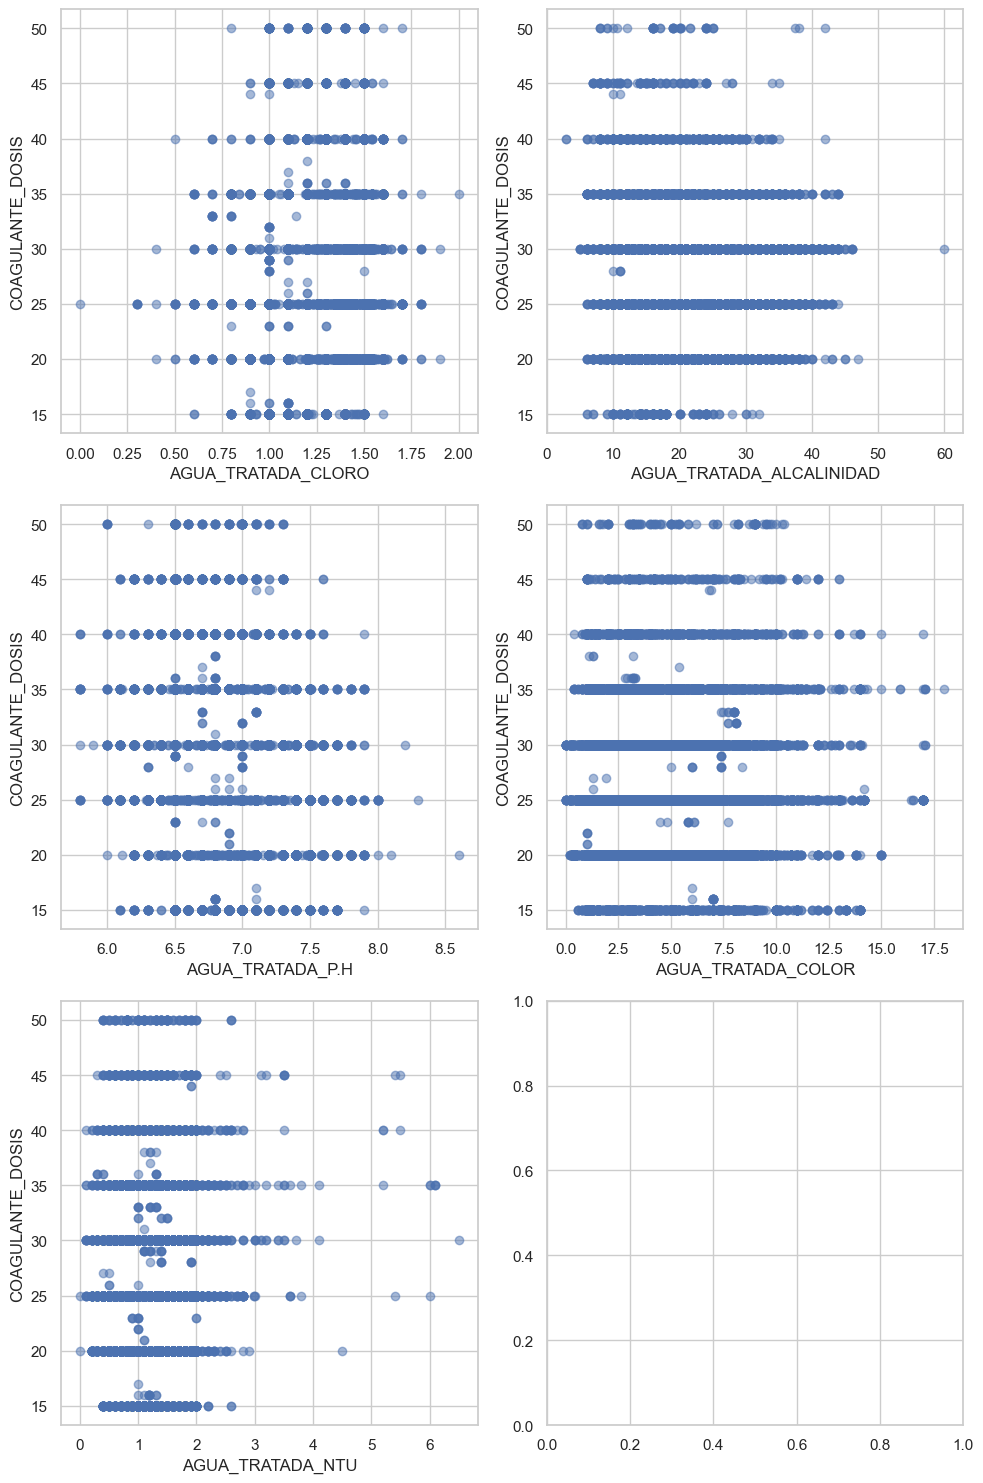

In [59]:
scatter(df)

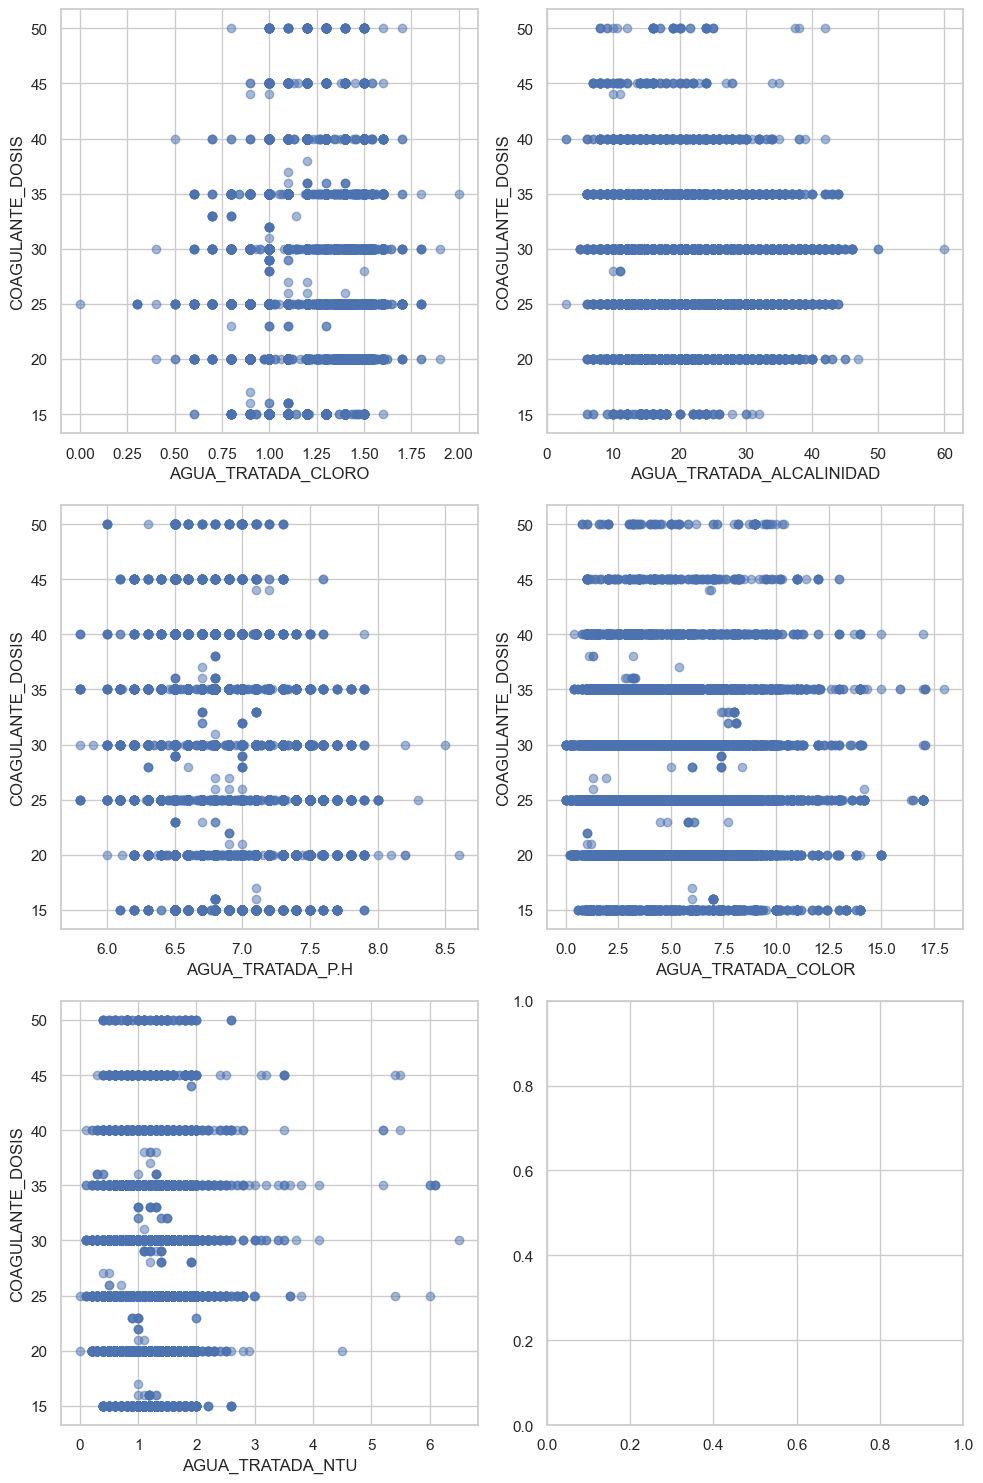

In [60]:
scatter(df_edit)

## ADICIÓN DE VARIABLES

Considerando análisis previos, se busca incorporar nuevas columnas que permitan clasificar los datos en base a dos análisis realizados. El primer análisis se refiere a la división diaria en el acueducto, por lo tanto, se creará un clasificador que separe los datos en dos grupos: aquellos que corresponden al rango de horas de 8 de la mañana a 8 de la noche, y aquellos que se encuentran fuera de ese rango horario.

La segunda clasificación se basará en los meses, dividiendo los datos en dos grupos: aquellos que se ubican entre junio y septiembre, y aquellos que pertenecen a los otros meses.

In [61]:
df['CLASIFICADOR_HORARIO'] = df['HORA'].apply(lambda x: 0 if 8 <= x <= 20 else 1)
df['CLASIFICADOR_MENSUAL'] = df['FECHA'].dt.month.apply(lambda x: 0 if 6 <= x <= 9 else 1)
df_edit['CLASIFICADOR_HORARIO'] = df_edit['HORA'].apply(lambda x: 0 if 8 <= x <= 20 else 1)
df_edit['CLASIFICADOR_MENSUAL'] = df_edit['FECHA'].dt.month.apply(lambda x: 0 if 6 <= x <= 9 else 1)

### ANÁLISIS MULTIVARIABLE

In [62]:
HEADERS_PRED = ['FECHA', 'CAUDAL', 'AGUA_CRUDA_P.H', 'AGUA_CRUDA_COLOR', 'AGUA_CRUDA_NTU', 'AGUA_CRUDA_ALCALINIDAD', 
                'AGUA_CRUDA_CONDUCTIVIDAD', 'COAGULANTE_GRANULADO', 'COAGULANTE_DOSIS', 'VEL_VIENTO', 'PRECIPITACION', 
                'TEMP_SECA', 'TEMP_HUMEDA','CLASIFICADOR_HORARIO', 'CLASIFICADOR_MENSUAL']
df_predictoras = df[HEADERS_PRED]
df_predictoras_edit = df_edit[HEADERS_PRED]

In [63]:
def correlation(df):
    corrmat = df.corr()
    f, ax = plt.subplots(figsize=(12, 9))
    sns.heatmap(corrmat, vmax=.8, annot = True, fmt = '.2f', annot_kws = {'size': 10}, square=True);

In [64]:
filtro_primeros_años = df_predictoras['FECHA'].dt.year.isin([2014,2015,2016])
filtro_ultimos_años= df_predictoras['FECHA'].dt.year.isin([2017, 2018, 2019, 2020, 2021, 2022])
filtro_primeros_años_edit = df_predictoras_edit['FECHA'].dt.year.isin([2014,2015,2016])
filtro_ultimos_años_edit= df_predictoras_edit['FECHA'].dt.year.isin([2017, 2018, 2019, 2020, 2021, 2022])

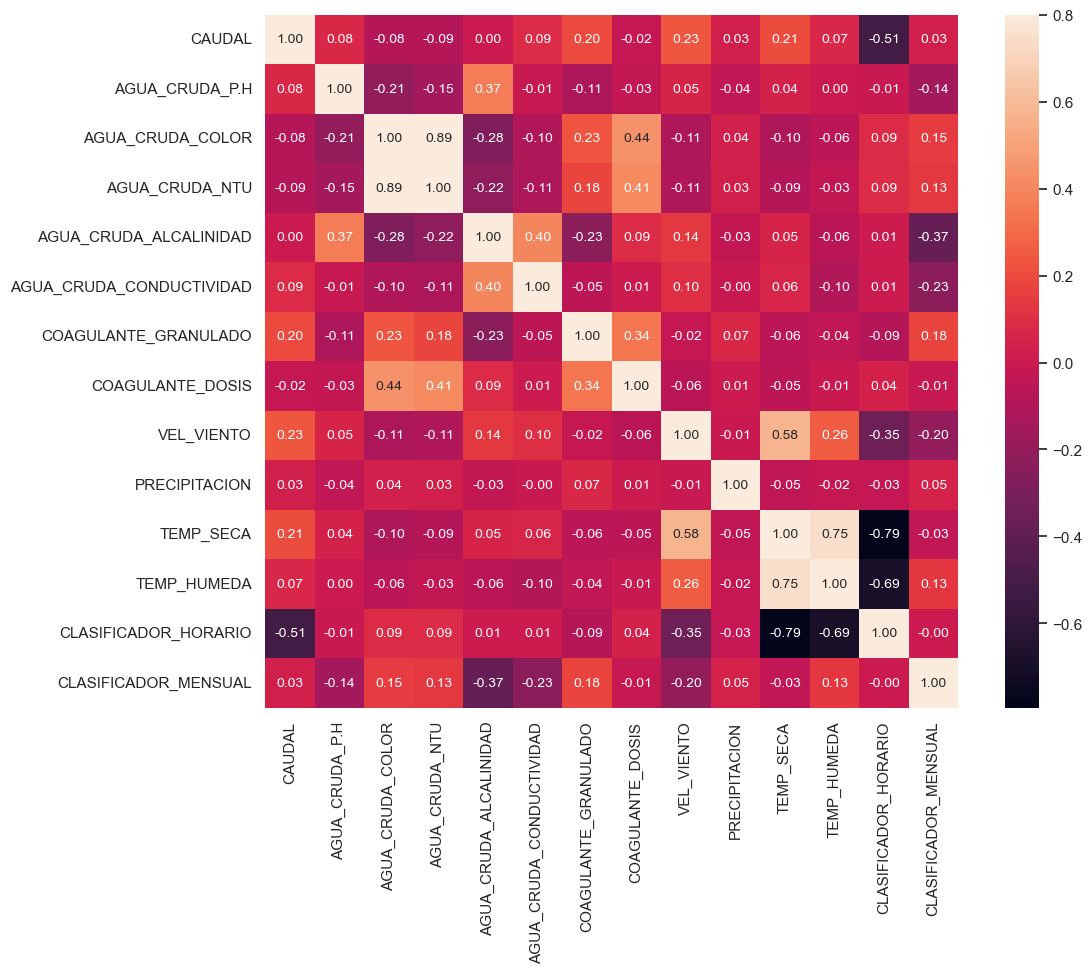

In [65]:
correlation(df_predictoras)

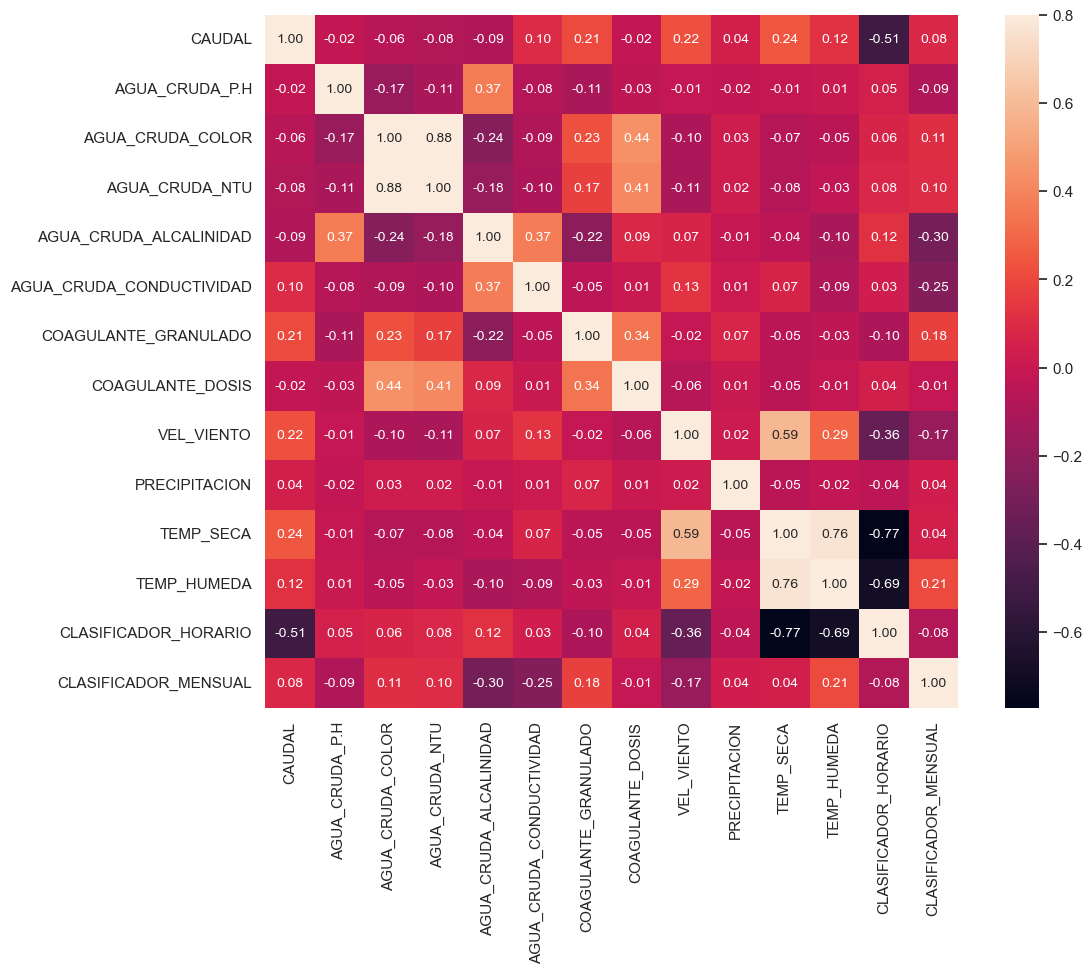

In [66]:
correlation(df_predictoras_edit)

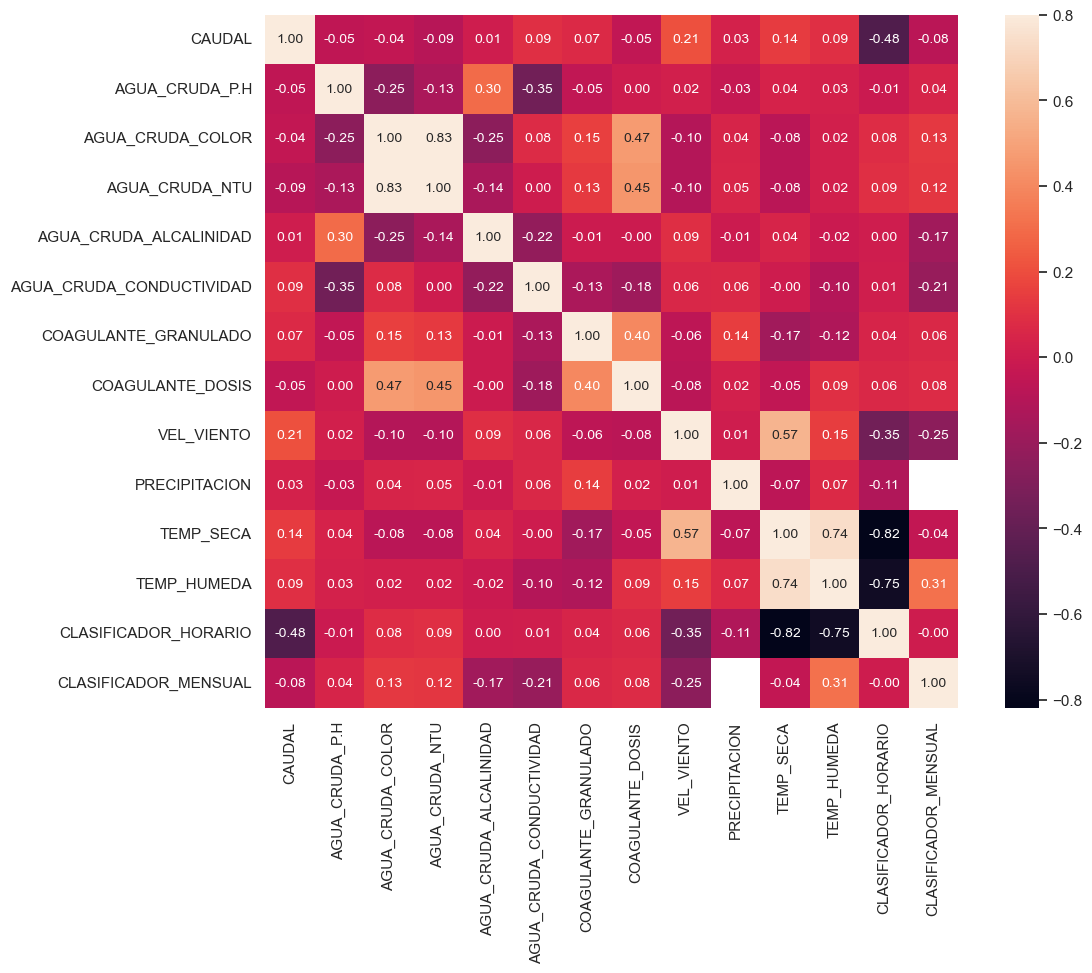

In [67]:
# Correlación primeros años
correlation(df_predictoras[filtro_primeros_años])

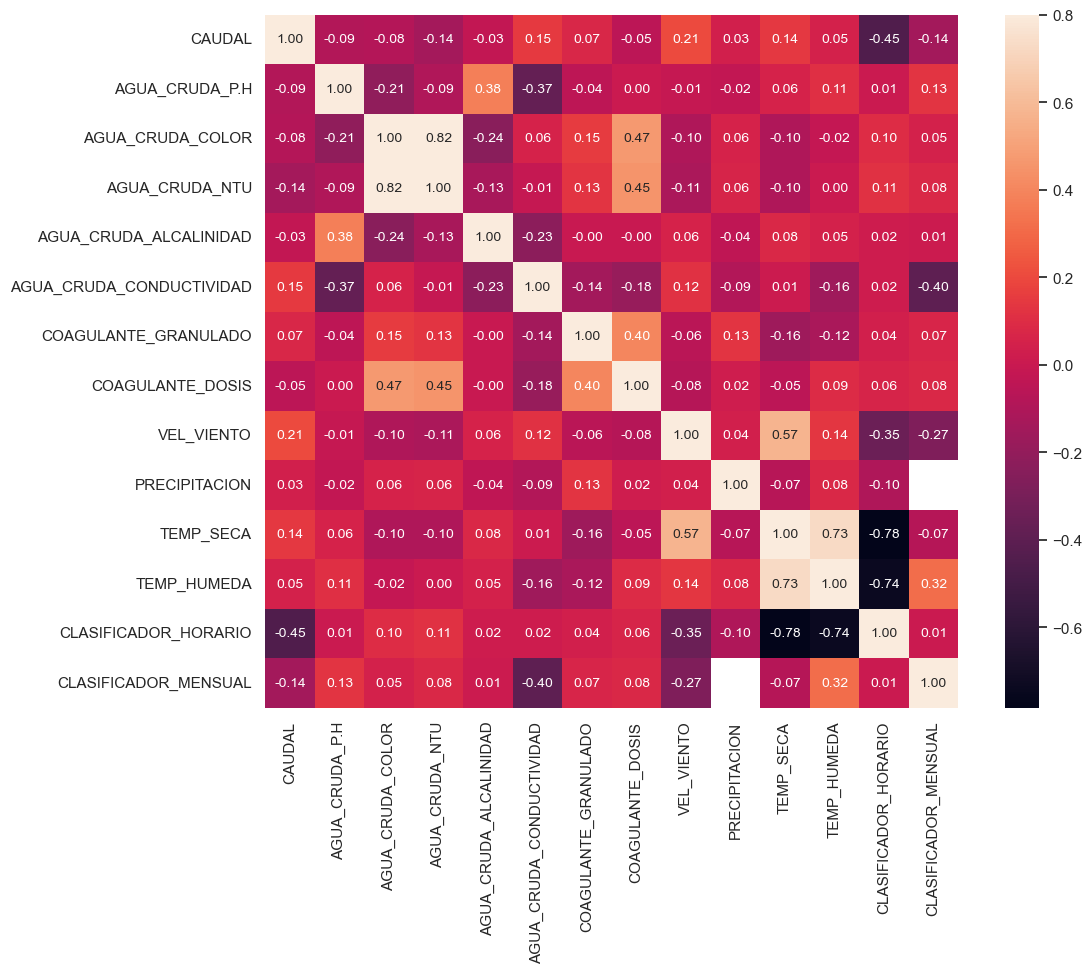

In [68]:
# Correlación primeros años
correlation(df_predictoras_edit[filtro_primeros_años_edit])

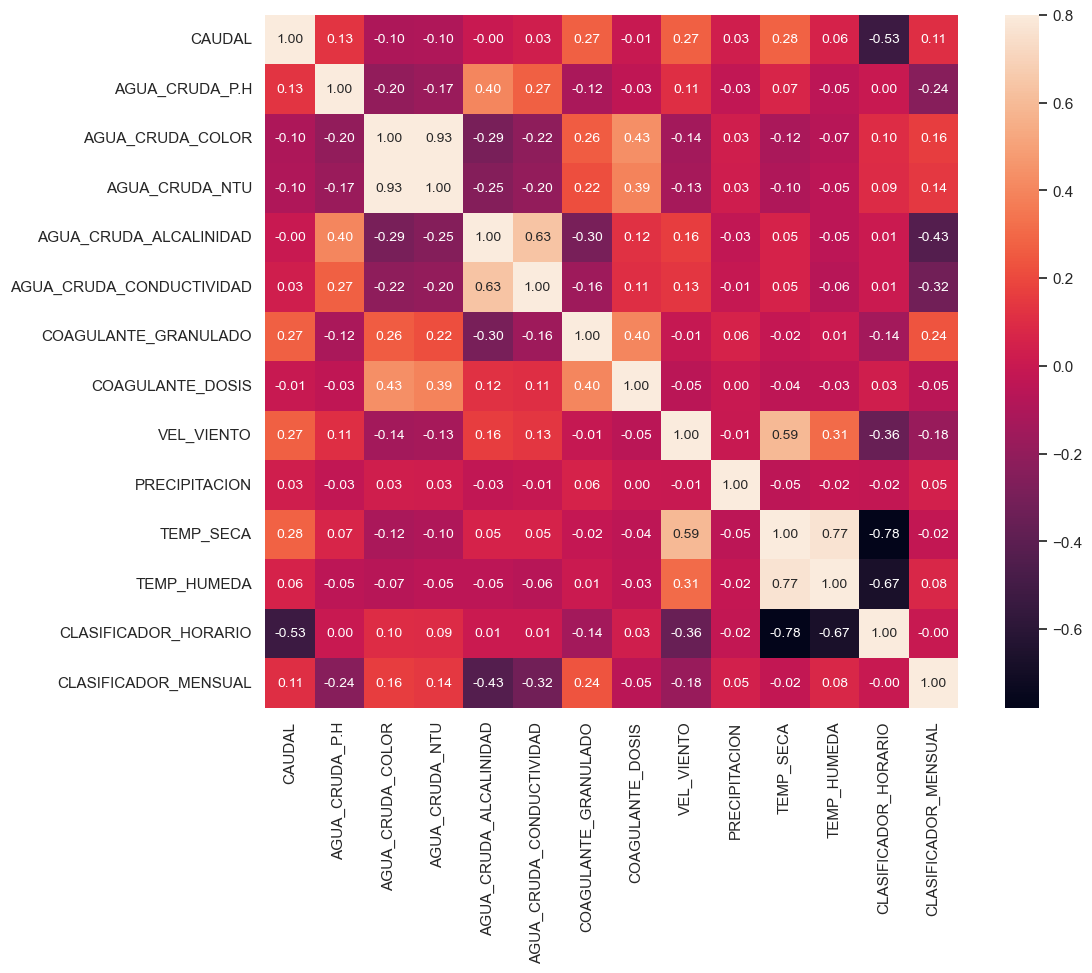

In [69]:
# Correlación ultimos años
correlation(df_predictoras[filtro_ultimos_años])

In [70]:
# Selecciona solo las columnas de tipo float en el DataFrame
df_float = df_predictoras[filtro_ultimos_años].select_dtypes(include=[float])

# Calcula la matriz de correlación
corr = df_float.corr()

# Selecciona las columnas relevantes en la matriz de correlación
corrmat = corr.loc[df_float.columns, ['COAGULANTE_DOSIS']]

# Ordena los valores de correlación y aplica un degradado de color
result = corrmat.sort_values(by='COAGULANTE_DOSIS', ascending=False).style.background_gradient()
result

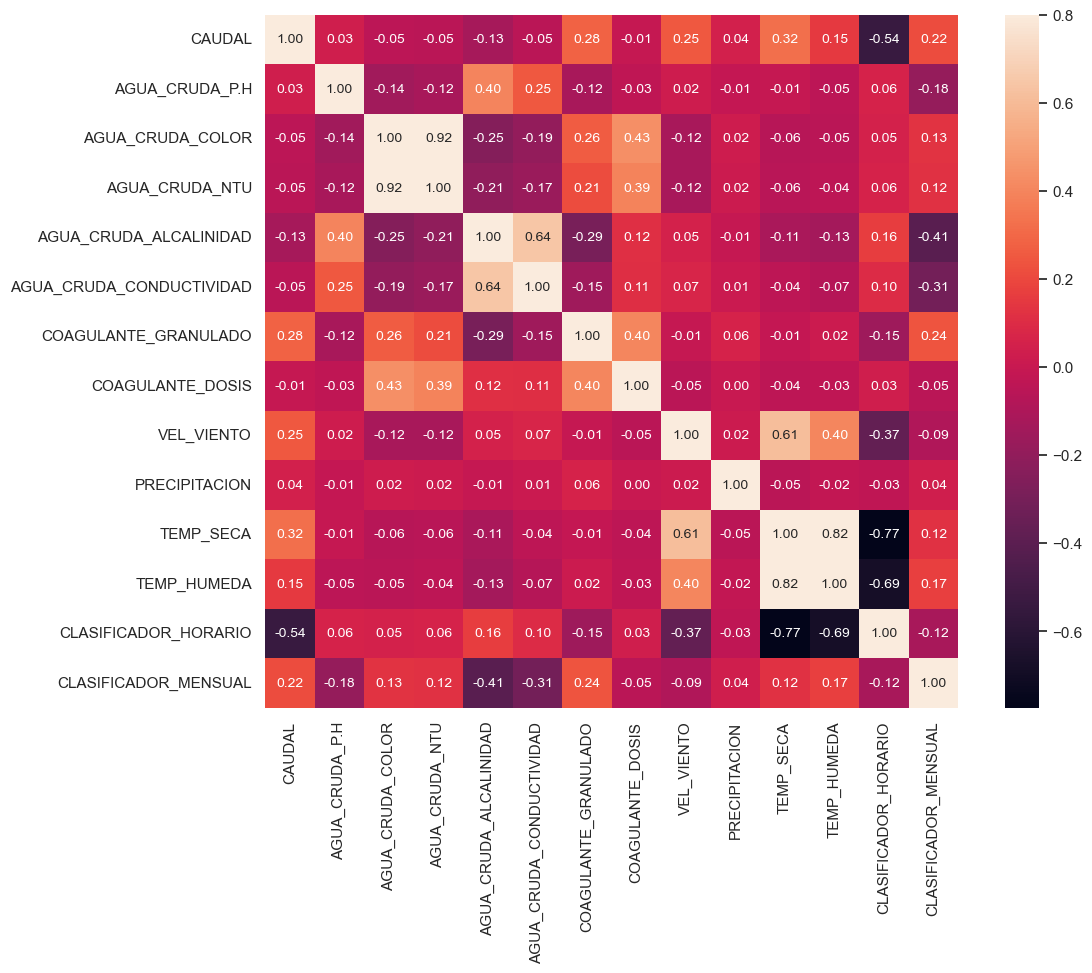

In [71]:
# Correlación ultimos años
correlation(df_predictoras_edit[filtro_ultimos_años_edit])

In [72]:
# Selecciona solo las columnas de tipo float en el DataFrame
df_float = df_predictoras_edit[filtro_ultimos_años_edit].select_dtypes(include=[float])

# Calcula la matriz de correlación
corr = df_float.corr()

# Selecciona las columnas relevantes en la matriz de correlación
corrmat = corr.loc[df_float.columns, ['COAGULANTE_DOSIS']]

# Ordena los valores de correlación y aplica un degradado de color
result = corrmat.sort_values(by='COAGULANTE_DOSIS', ascending=False).style.background_gradient()
result

Realizando el análisis de correlaciones, se ha observado una fuerte correlación entre el color y la turbiedad, así como entre la temperatura seca y la temperatura húmeda, así como con el clasificador horario. Para evitar problemas de colinealidad en el modelo, se tomará la decisión de eliminar las variables de turbiedad y temperatura seca.

In [73]:
HEADERS_TRATADA = ['FECHA', 'COAGULANTE_DOSIS', 'AGUA_TRATADA_CLORO', 'AGUA_TRATADA_ALCALINIDAD', 'AGUA_TRATADA_P.H', 
                   'AGUA_TRATADA_COLOR', 'AGUA_TRATADA_NTU', 'CLASIFICADOR_HORARIO', 'CLASIFICADOR_MENSUAL']
df_tratada = df[HEADERS_TRATADA]
df_tratada_edit = df_edit[HEADERS_TRATADA]

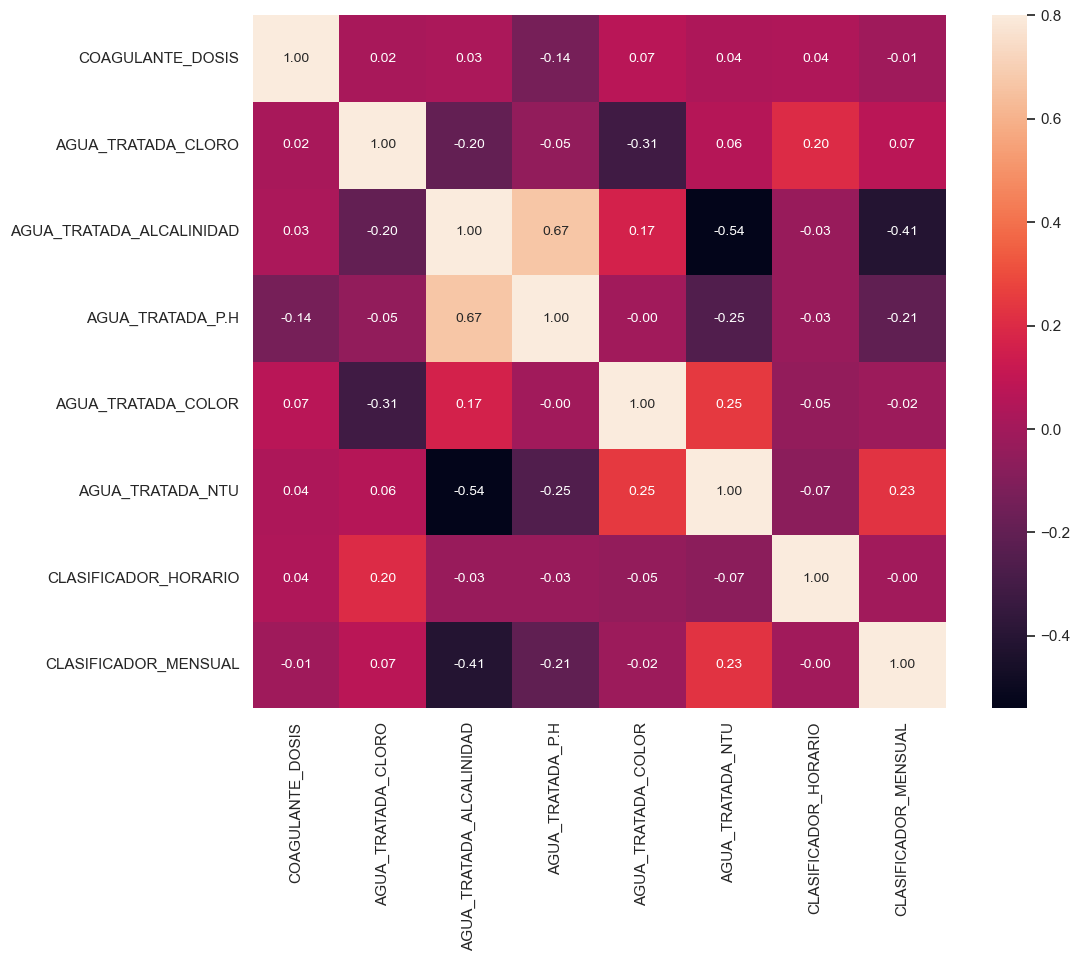

In [74]:
# Matriz de correlación:
correlation(df_tratada)

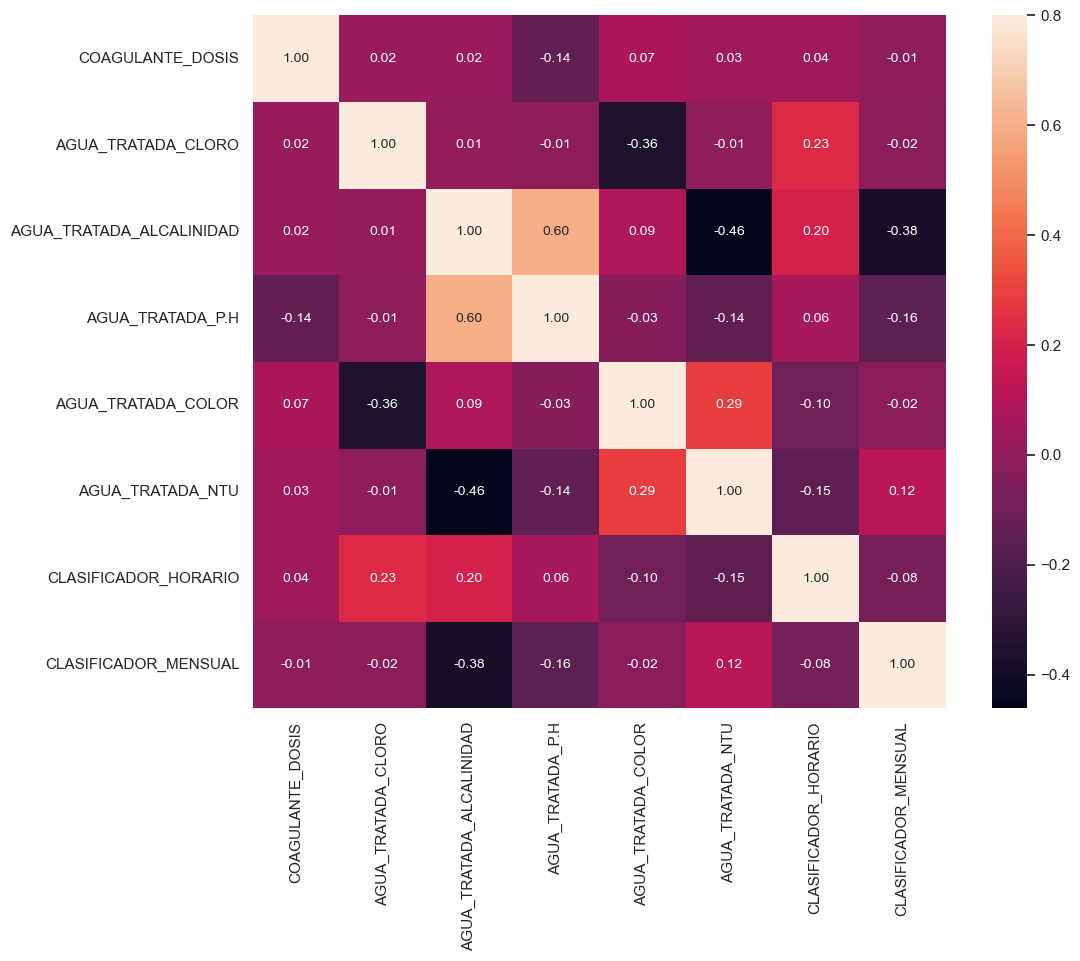

In [75]:
# Matriz de correlación:
correlation(df_tratada_edit)

In [76]:
df_2017= df[df['FECHA'].dt.year.isin([2017, 2018, 2019, 2020, 2021, 2022])]
df_edit_2017= df_edit[df_edit['FECHA'].dt.year.isin([2017, 2018, 2019, 2020, 2021, 2022])]
HEADERS_PRED = ['FECHA','HORA','CAUDAL', 'AGUA_CRUDA_P.H', 'AGUA_CRUDA_COLOR','AGUA_CRUDA_NTU','AGUA_CRUDA_ALCALINIDAD', 'AGUA_CRUDA_CONDUCTIVIDAD', 
                'COAGULANTE_DOSIS', 'VEL_VIENTO', 'PRECIPITACION', 'TEMP_HUMEDA','CLASIFICADOR_HORARIO','CLASIFICADOR_MENSUAL']
df = df[HEADERS_PRED]
df_edit = df_edit[HEADERS_PRED]
df_2017 = df_2017[HEADERS_PRED]
df_edit_2017 = df_edit_2017[HEADERS_PRED]

In [77]:
df.to_csv('../data/dataframe_analysis.csv', sep=',')
df_edit.to_csv('../data_edit/dataframe_edit_analysis.csv', sep=',')
df_2017.to_csv('../data/dataframe_analysis_2017.csv', sep=',')
df_edit_2017.to_csv('../data_edit/dataframe_edit_analysis_2017.csv', sep=',')

In [78]:
df_edit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51573 entries, 35 to 87647
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   FECHA                     51573 non-null  datetime64[ns]
 1   HORA                      51573 non-null  int64         
 2   CAUDAL                    51562 non-null  float64       
 3   AGUA_CRUDA_P.H            51282 non-null  float64       
 4   AGUA_CRUDA_COLOR          48668 non-null  float64       
 5   AGUA_CRUDA_NTU            51488 non-null  float64       
 6   AGUA_CRUDA_ALCALINIDAD    42716 non-null  float64       
 7   AGUA_CRUDA_CONDUCTIVIDAD  38055 non-null  float64       
 8   COAGULANTE_DOSIS          43483 non-null  float64       
 9   VEL_VIENTO                39787 non-null  float64       
 10  PRECIPITACION             22310 non-null  float64       
 11  TEMP_HUMEDA               4181 non-null   float64       
 12  CLASIFICADOR_HORA